# **KUBIG 2024 Fall Conference Project**

## **Causal Inference Project**

### **19기 정종락**

>

# **Setting**

In [159]:
import pandas as pd
import numpy as np

import plotnine as p
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_light, scale_color_manual, theme, guides, element_text, geom_vline

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [160]:
path = 'yourpath'

In [161]:
df = pd.read_csv(path + 'data/Final/final_df.csv')

In [162]:
df

,AUN_SUM,AUUNCOST,AUUNNCOV,AUUNENUF,AUUN_ANY,AUPOPAMT,HEALTH,K6SCMON,PRVHLTIN,GRPHLTIN,...,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,NaN,NaN,NaN,0,NaN,3.0,9.0,1.0,1.0,...,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,NaN,NaN,NaN,0,NaN,5.0,NaN,2.0,2.0,...,0.0,0.0,0.8,0.0,0,0,0.00,NaN,1.0,1.0
2,0.0,NaN,NaN,NaN,0,NaN,5.0,0.0,2.0,2.0,...,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
3,0.0,NaN,NaN,NaN,0,NaN,5.0,4.0,1.0,1.0,...,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
4,0.0,NaN,NaN,NaN,0,NaN,3.0,0.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873398,0.0,NaN,NaN,NaN,0,NaN,5.0,NaN,2.0,2.0,...,0.0,0.0,0.8,0.0,0,0,0.00,6.0,1.0,1.0
873399,0.0,NaN,NaN,NaN,0,NaN,5.0,0.0,2.0,2.0,...,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
873400,0.0,NaN,NaN,NaN,0,NaN,4.0,0.0,1.0,1.0,...,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
873401,0.0,NaN,NaN,NaN,0,NaN,4.0,1.0,2.0,2.0,...,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [163]:
df.columns

Index(['AUN_SUM', 'AUUNCOST', 'AUUNNCOV', 'AUUNENUF', 'AUUN_ANY', 'AUPOPAMT',
       'HEALTH', 'K6SCMON', 'PRVHLTIN', 'GRPHLTIN', 'YEAR', 'Treatment',
       'Post', 'QUESTID2', 'AGE2', 'IRSEX', 'INCOME', 'IRMARIT', 'SERVICE',
       'CG30EST', 'AL30EST', 'IRHHSIZ2', 'NOBOOKY2', 'COCFLAG', 'COCYR',
       'EDUCCAT2', 'JBSTATR2', 'TXEVER', 'TXYREVER'],
      dtype='object')

In [164]:
df = df.drop(['AUUNCOST', 'AUUNNCOV', 'AUUNENUF', 'AUPOPAMT'], axis = 1)

In [165]:
df.isna().sum()

AUN_SUM           0
AUUN_ANY          0
HEALTH          178
K6SCMON      250046
PRVHLTIN       7318
GRPHLTIN       8944
YEAR              0
Treatment         0
Post              0
QUESTID2          0
AGE2              0
IRSEX             0
INCOME            0
IRMARIT           0
SERVICE      208030
CG30EST         605
AL30EST       14116
IRHHSIZ2          0
NOBOOKY2      11548
COCFLAG           0
COCYR             0
EDUCCAT2          0
JBSTATR2     125514
TXEVER         9535
TXYREVER       9585
dtype: int64

In [166]:
df.shape

(873403, 25)

In [167]:
df['Treatment'] = ((df['PRVHLTIN'] == 1) & (df['GRPHLTIN'] == 1)).astype(int)
df['Post'] = (df['YEAR'] >= 2010).astype(int)
df = df.drop(['PRVHLTIN', 'GRPHLTIN'], axis = 1)
df = df.dropna()

In [168]:
df.head()

,AUN_SUM,AUUN_ANY,HEALTH,K6SCMON,YEAR,Treatment,Post,QUESTID2,AGE2,IRSEX,...,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,0,3.0,9.0,2013,1,1,2013_53815143,0.666667,2,...,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
2,0.0,0,5.0,0.0,2013,0,1,2013_55565143,0.333333,1,...,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
3,0.0,0,5.0,4.0,2013,1,1,2013_83765143,0.333333,2,...,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
4,0.0,0,3.0,0.0,2013,0,1,2013_91965143,0.666667,2,...,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
5,0.0,0,3.0,3.0,2013,0,1,2013_64285143,0.333333,1,...,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0


In [169]:
df.shape

(602949, 23)

In [170]:
df.isna().sum()

AUN_SUM      0
AUUN_ANY     0
HEALTH       0
K6SCMON      0
YEAR         0
Treatment    0
Post         0
QUESTID2     0
AGE2         0
IRSEX        0
INCOME       0
IRMARIT      0
SERVICE      0
CG30EST      0
AL30EST      0
IRHHSIZ2     0
NOBOOKY2     0
COCFLAG      0
COCYR        0
EDUCCAT2     0
JBSTATR2     0
TXEVER       0
TXYREVER     0
dtype: int64

In [171]:
y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]
y_vars_cat = ["AUUN_ANY"]

In [172]:
df['INCOME'].unique()

array([1.        , 0.        , 0.33333333, 0.66666667])

>

# **Parallel Pre-trends Assumption**

## **Graphical Analysis**

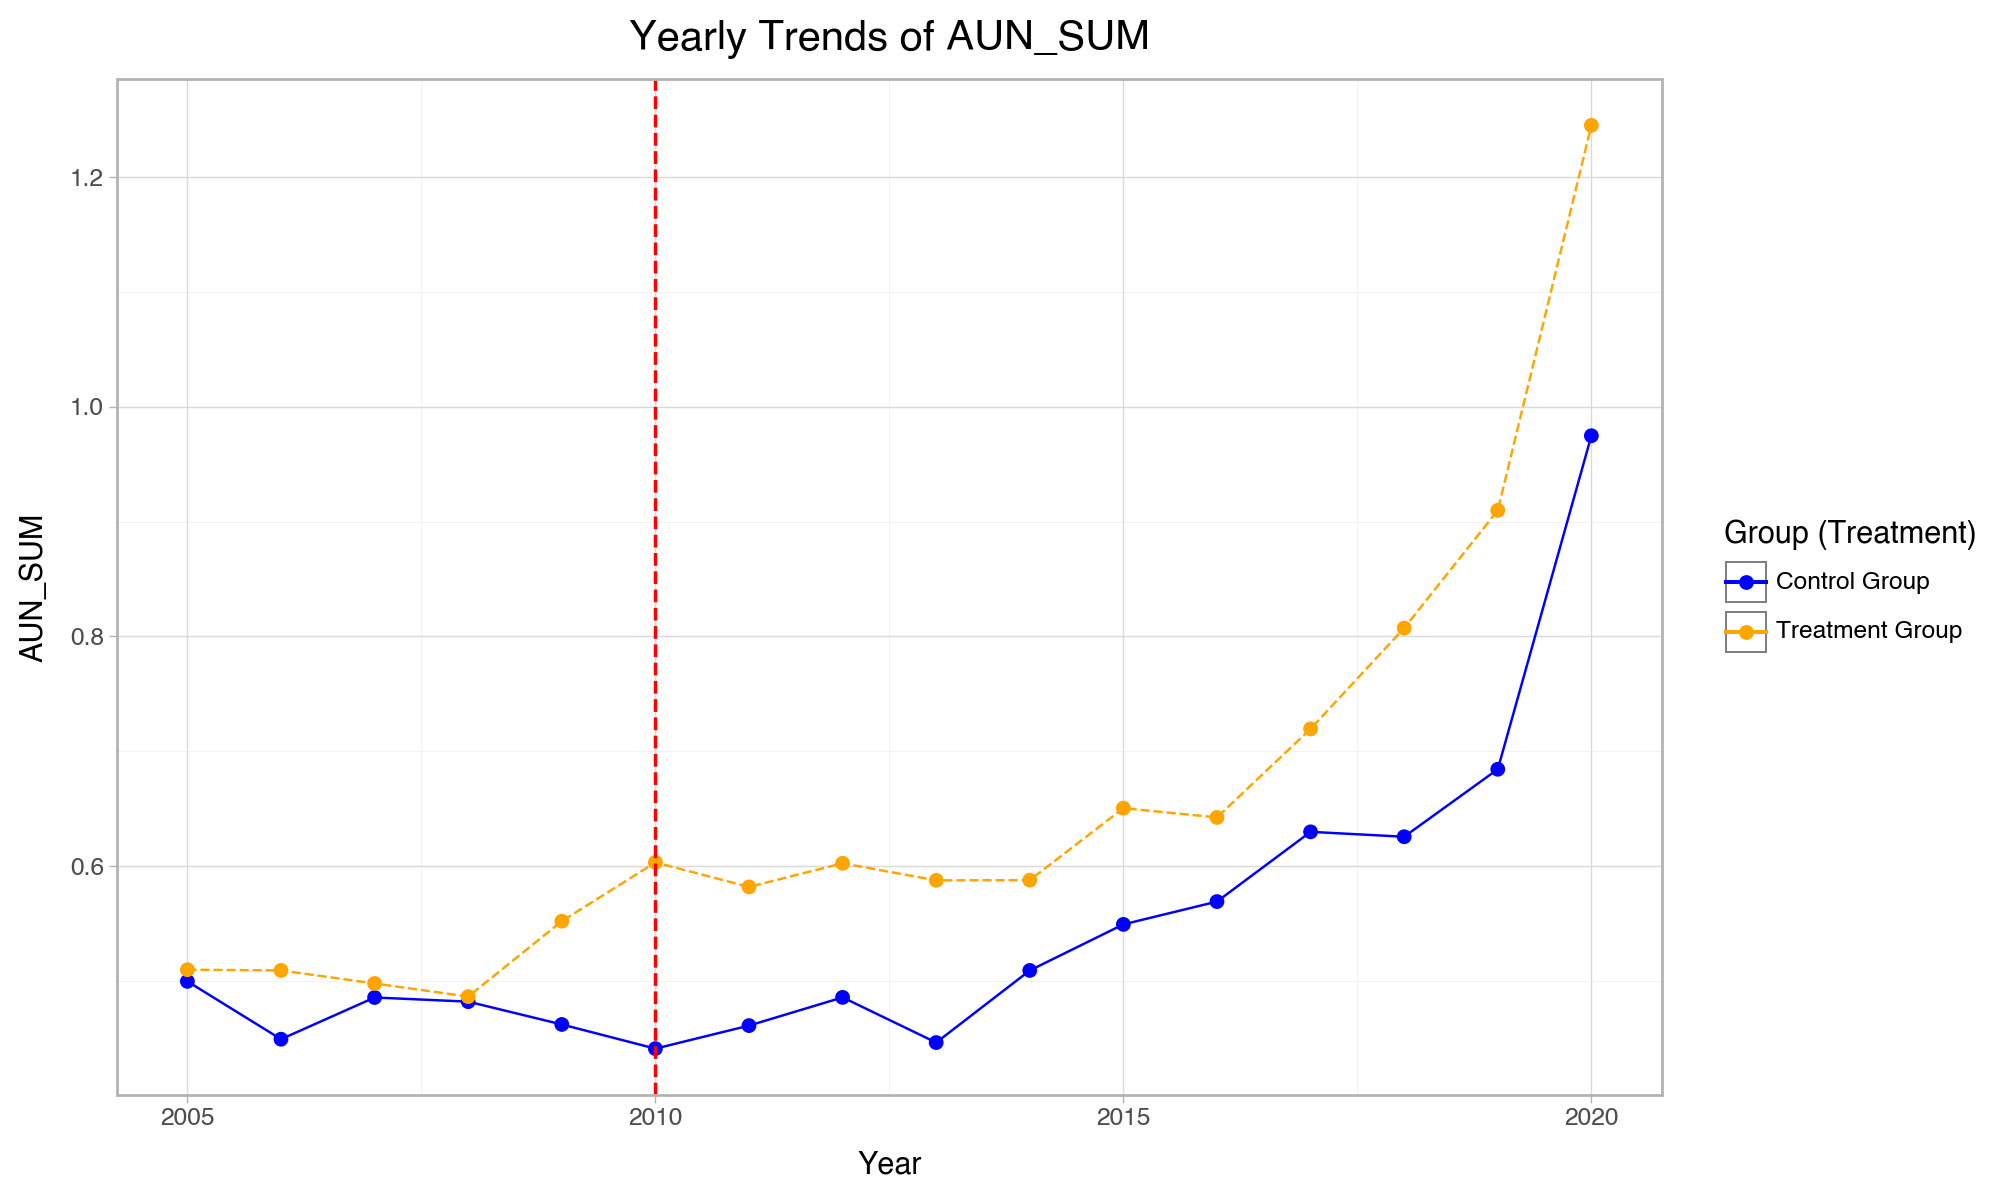

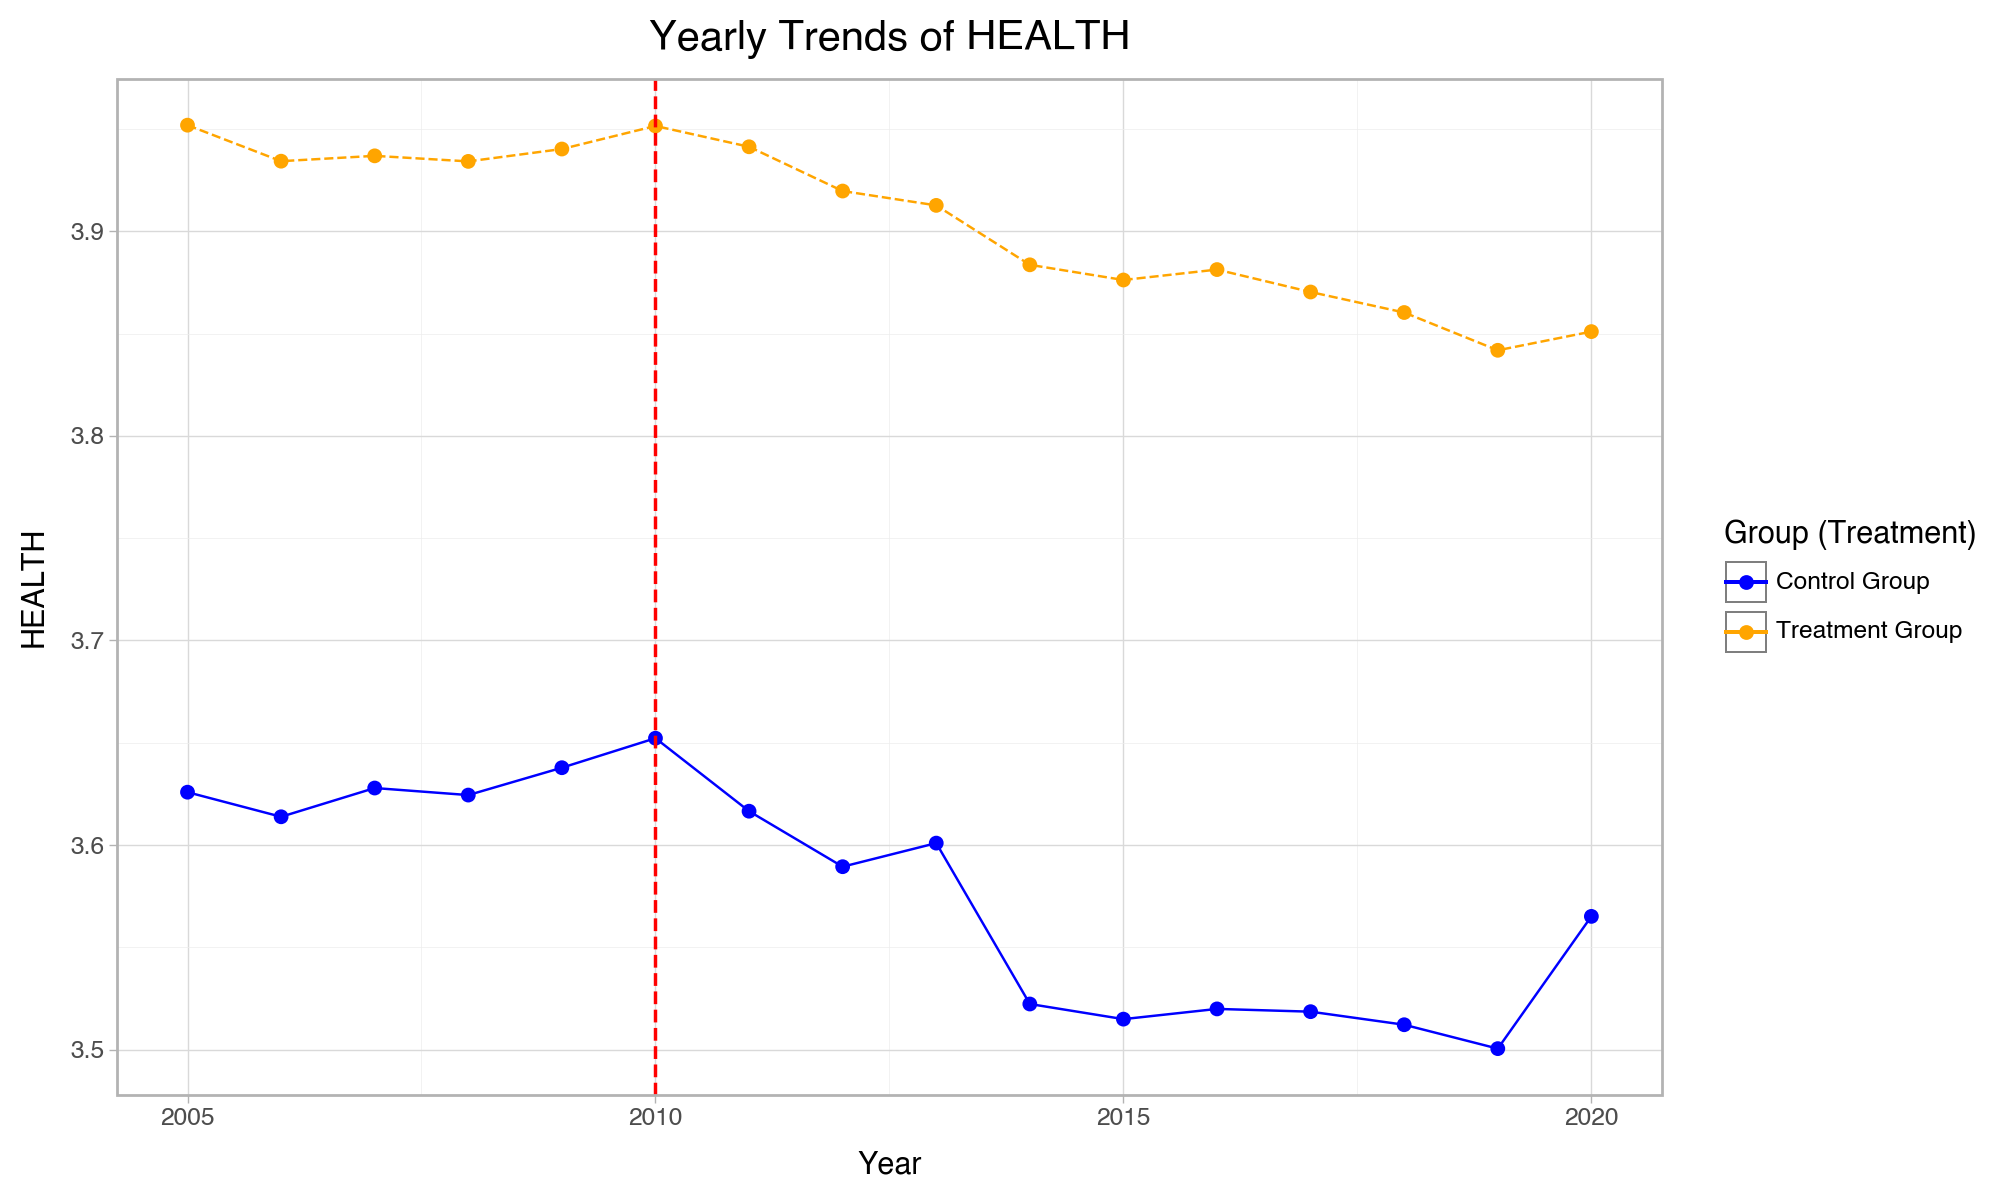

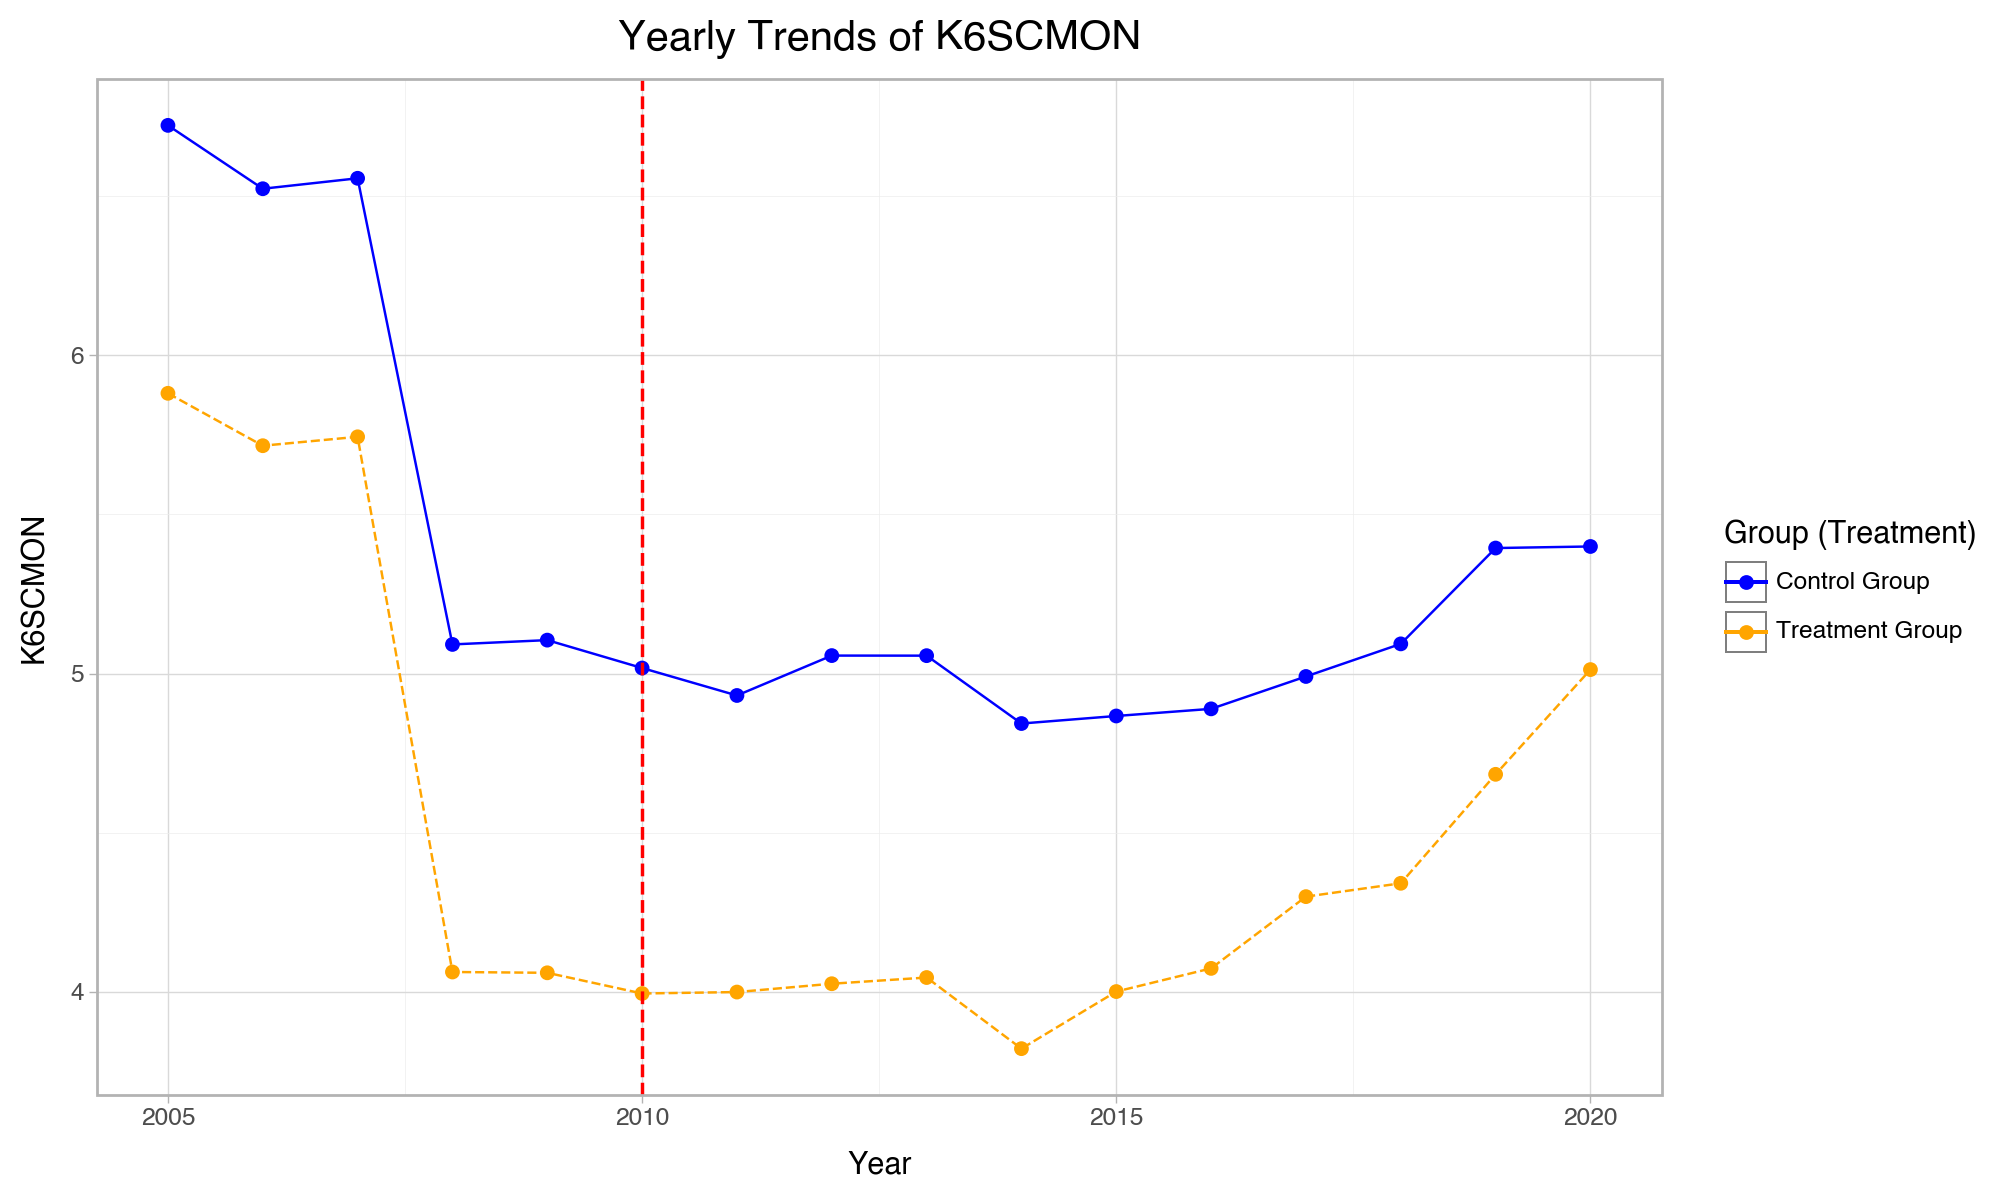

In [173]:
from plotnine import (
    ggplot, aes, geom_line, geom_point, labs, scale_color_manual, 
    guides, theme_light, theme, element_text, geom_vline
)

grouped_data = (
    df.groupby(['YEAR', 'Treatment'])[y_vars]
    .mean()
    .reset_index()
    .melt(id_vars=['YEAR', 'Treatment'], value_vars=y_vars, var_name='Variable', value_name='Value')
)

# Plotnine 플롯 생성
for y_var in y_vars:
    plot = (
        ggplot(grouped_data[grouped_data['Variable'] == y_var], aes(x='YEAR', y='Value', color='factor(Treatment)')) +
        geom_line(aes(linetype='factor(Treatment)')) +
        geom_point(size=2) +
        geom_vline(xintercept=2010, linetype='dashed', color='red', size=0.7) +  # 2010 기준선 추가
        labs(
            title=f'Yearly Trends of {y_var}',
            x='Year',
            y=y_var,
            color='Group (Treatment)'  # 색상 범례 레이블
        ) +
        scale_color_manual(values=['blue', 'orange'], labels=['Control Group', 'Treatment Group']) +
        guides(linetype=False) +  # 불필요한 linetype 범례 제거
        theme_light() +
        theme(
            figure_size=(10, 6),  # 플롯 크기 설정
            plot_title=element_text(size=15)  # 제목 크기와 볼드 처리
        )
    )
    plot.show()


## **Statistical Analysis**

### **Dynamic Effects Model & Event Study Plots**

**기준 연도(Base Year):**
   - 기준 연도를 선택해 해당 연도의 상호작용 효과를 제외하고 나머지 연도와의 차이를 추정
   - 여기서는 가장 이른 시점인 2005년을 기준 연도로 설정

**회귀식 표현:**
   $$
   Y_{it} = \alpha + \sum_{t \neq \text{Base Year}} \beta_t (\text{Treatment}_i \cdot \text{Year}_t) + \delta_t + \gamma_i + \epsilon_{it}
   $$
   - $\beta_t$: 특정 연도 $t$에서의 처리 효과.
   - 기준 연도의 계수는 0으로 고정되어, 다른 연도와의 차이를 비교 기준으로

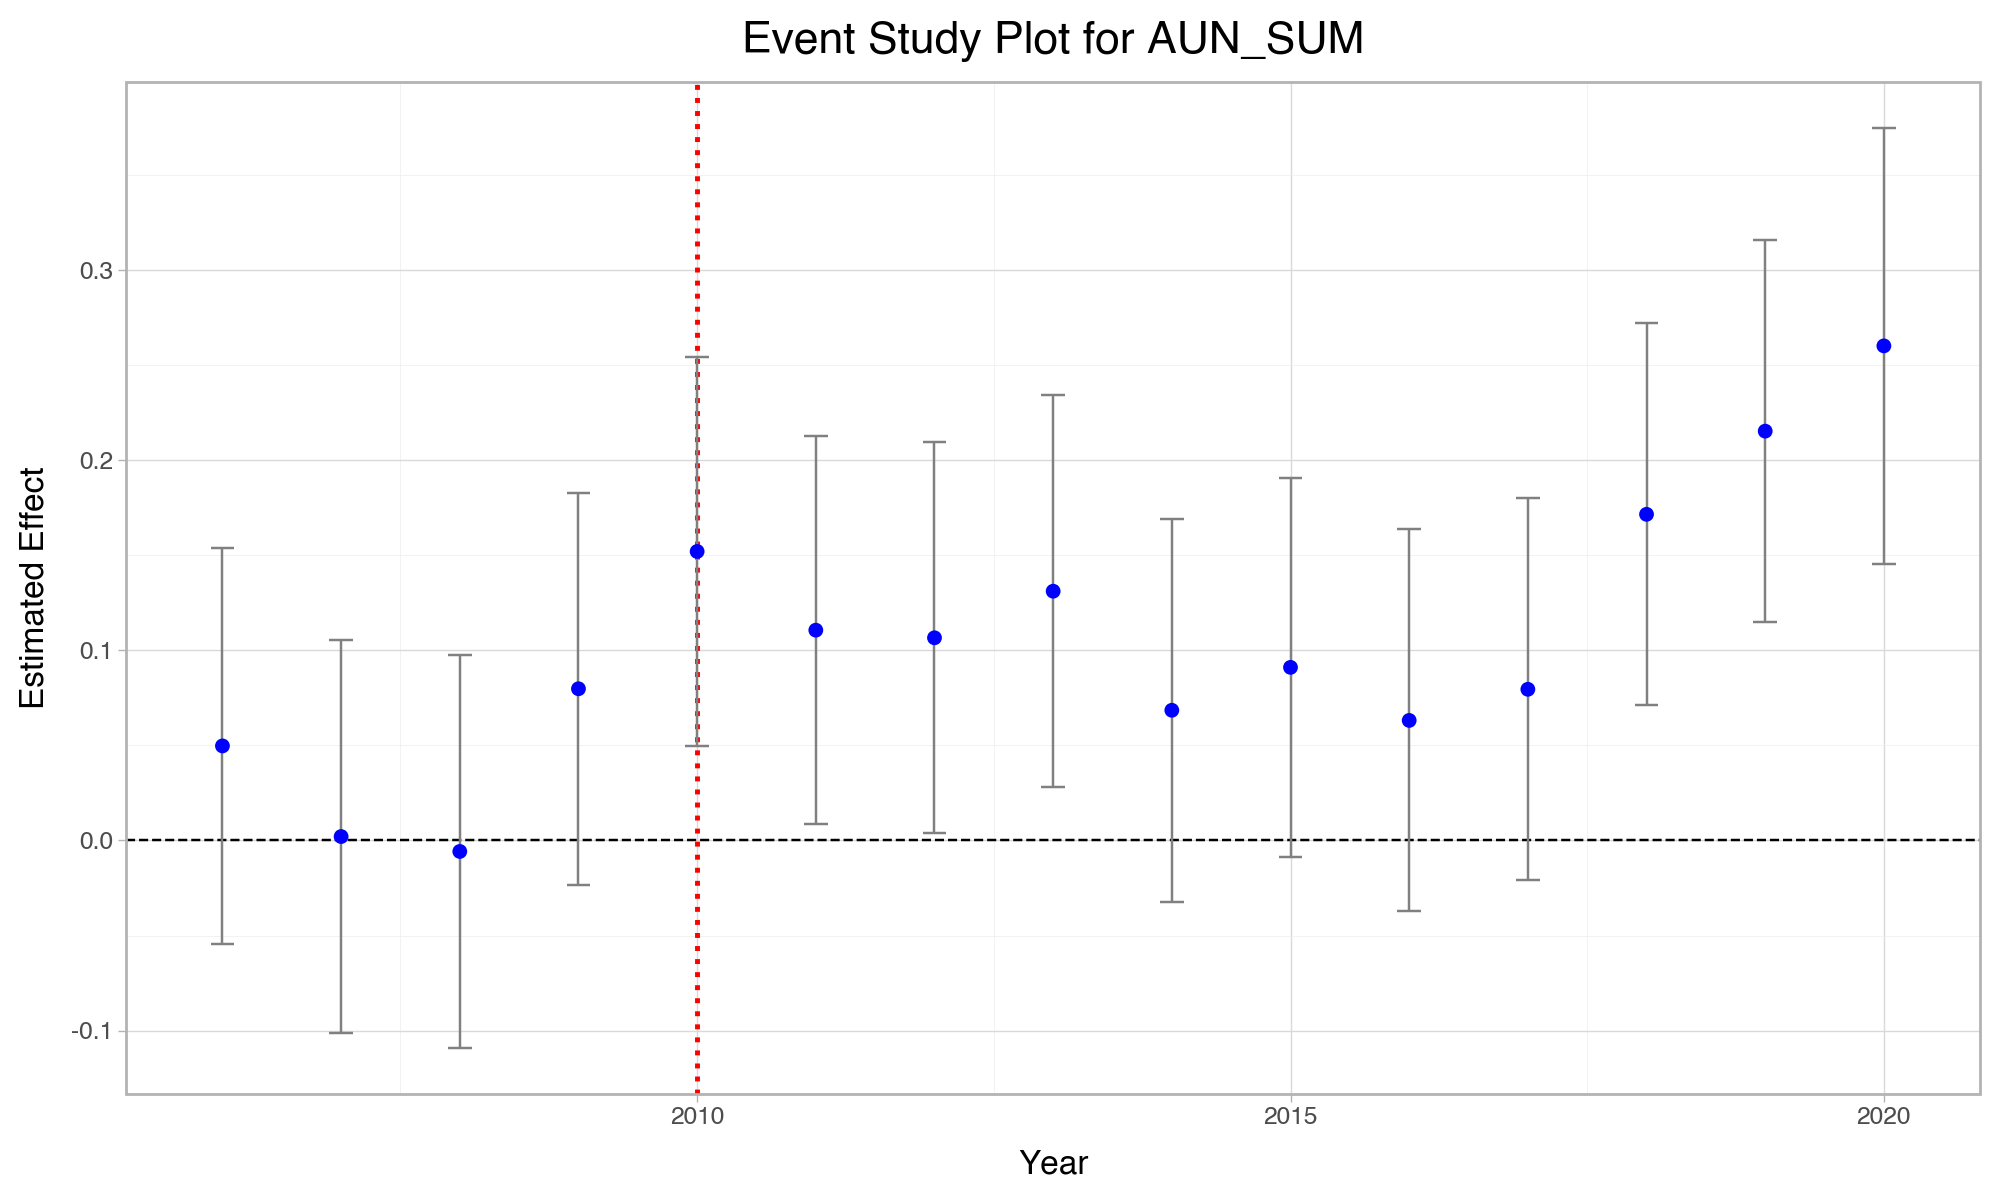

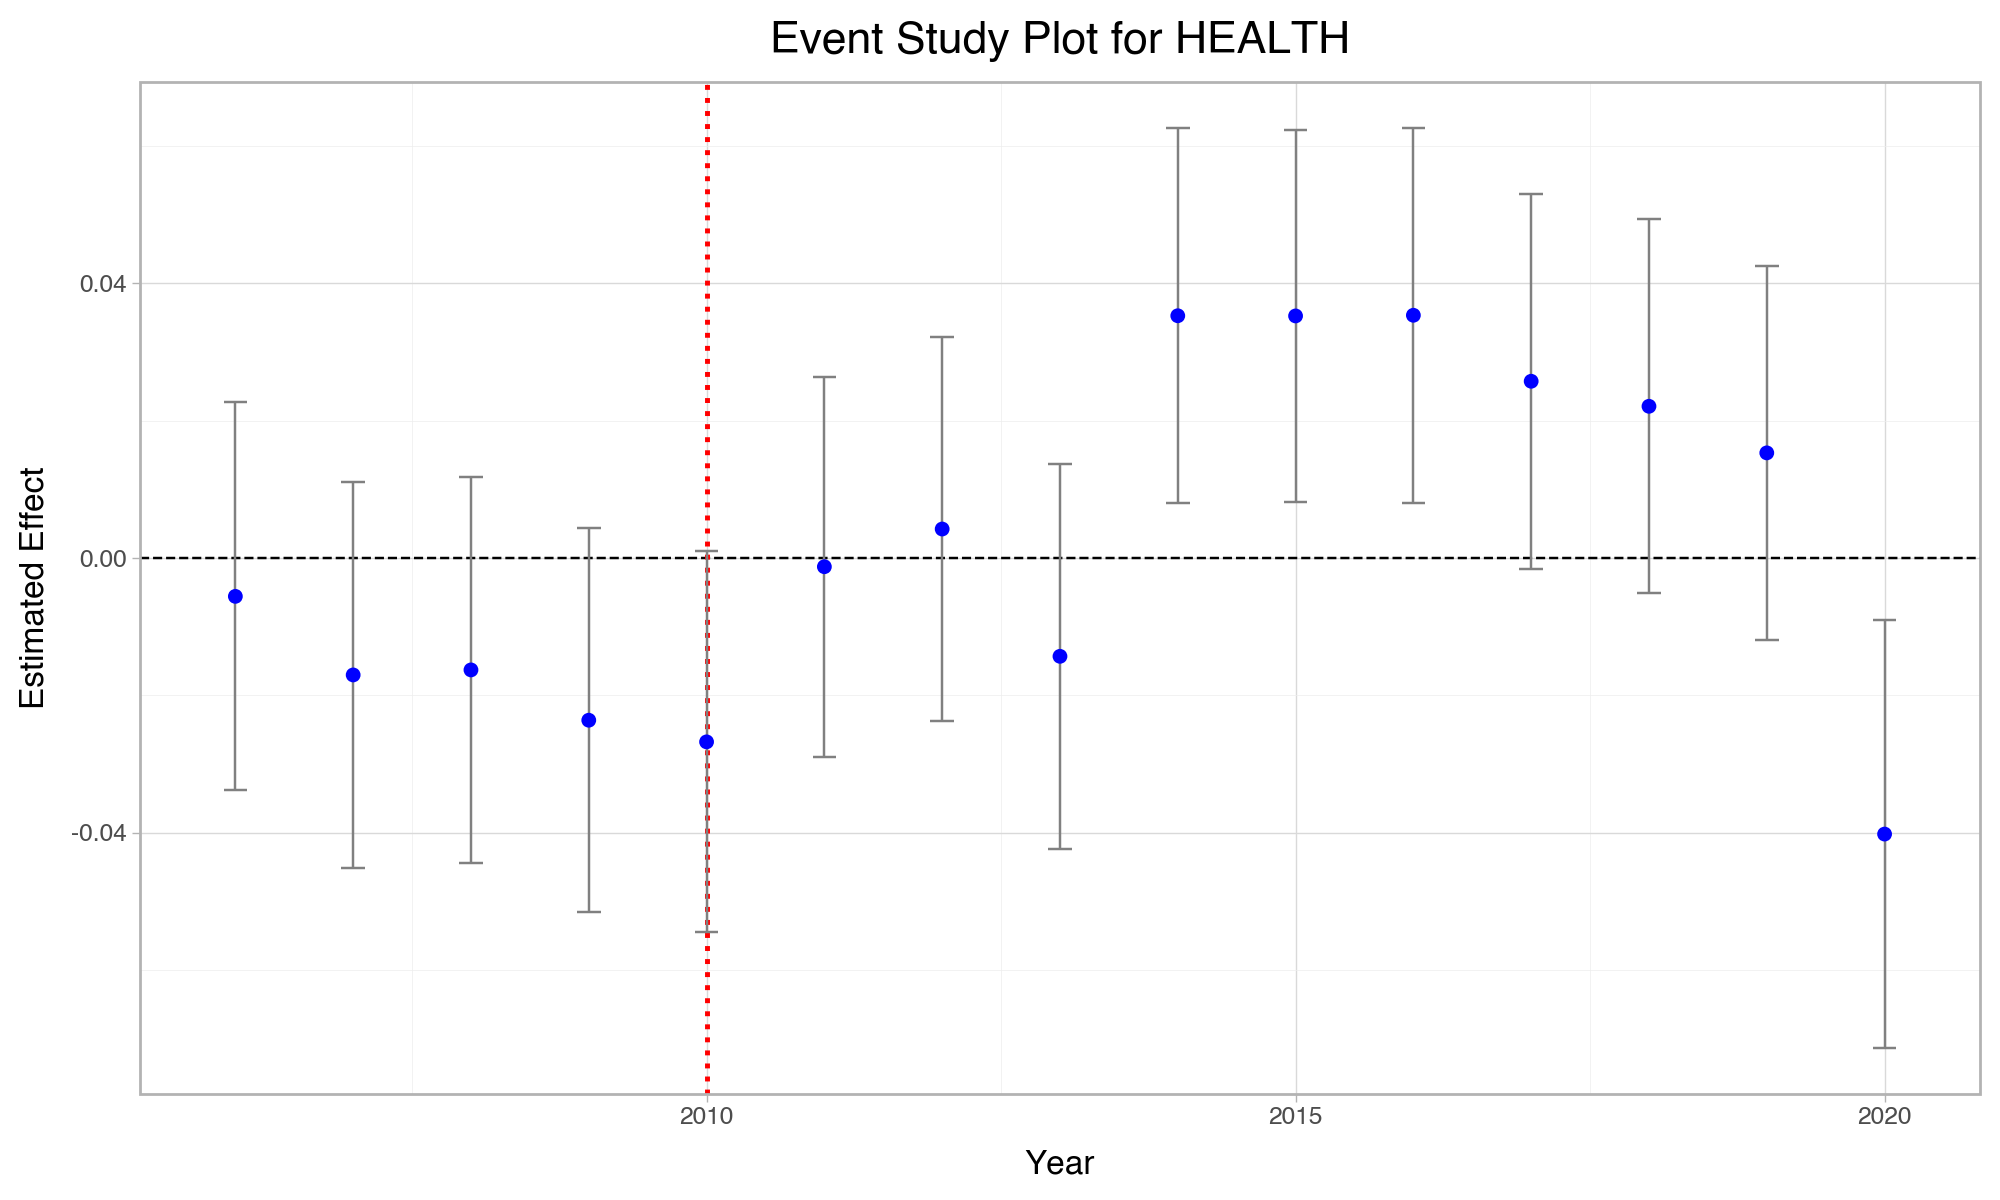

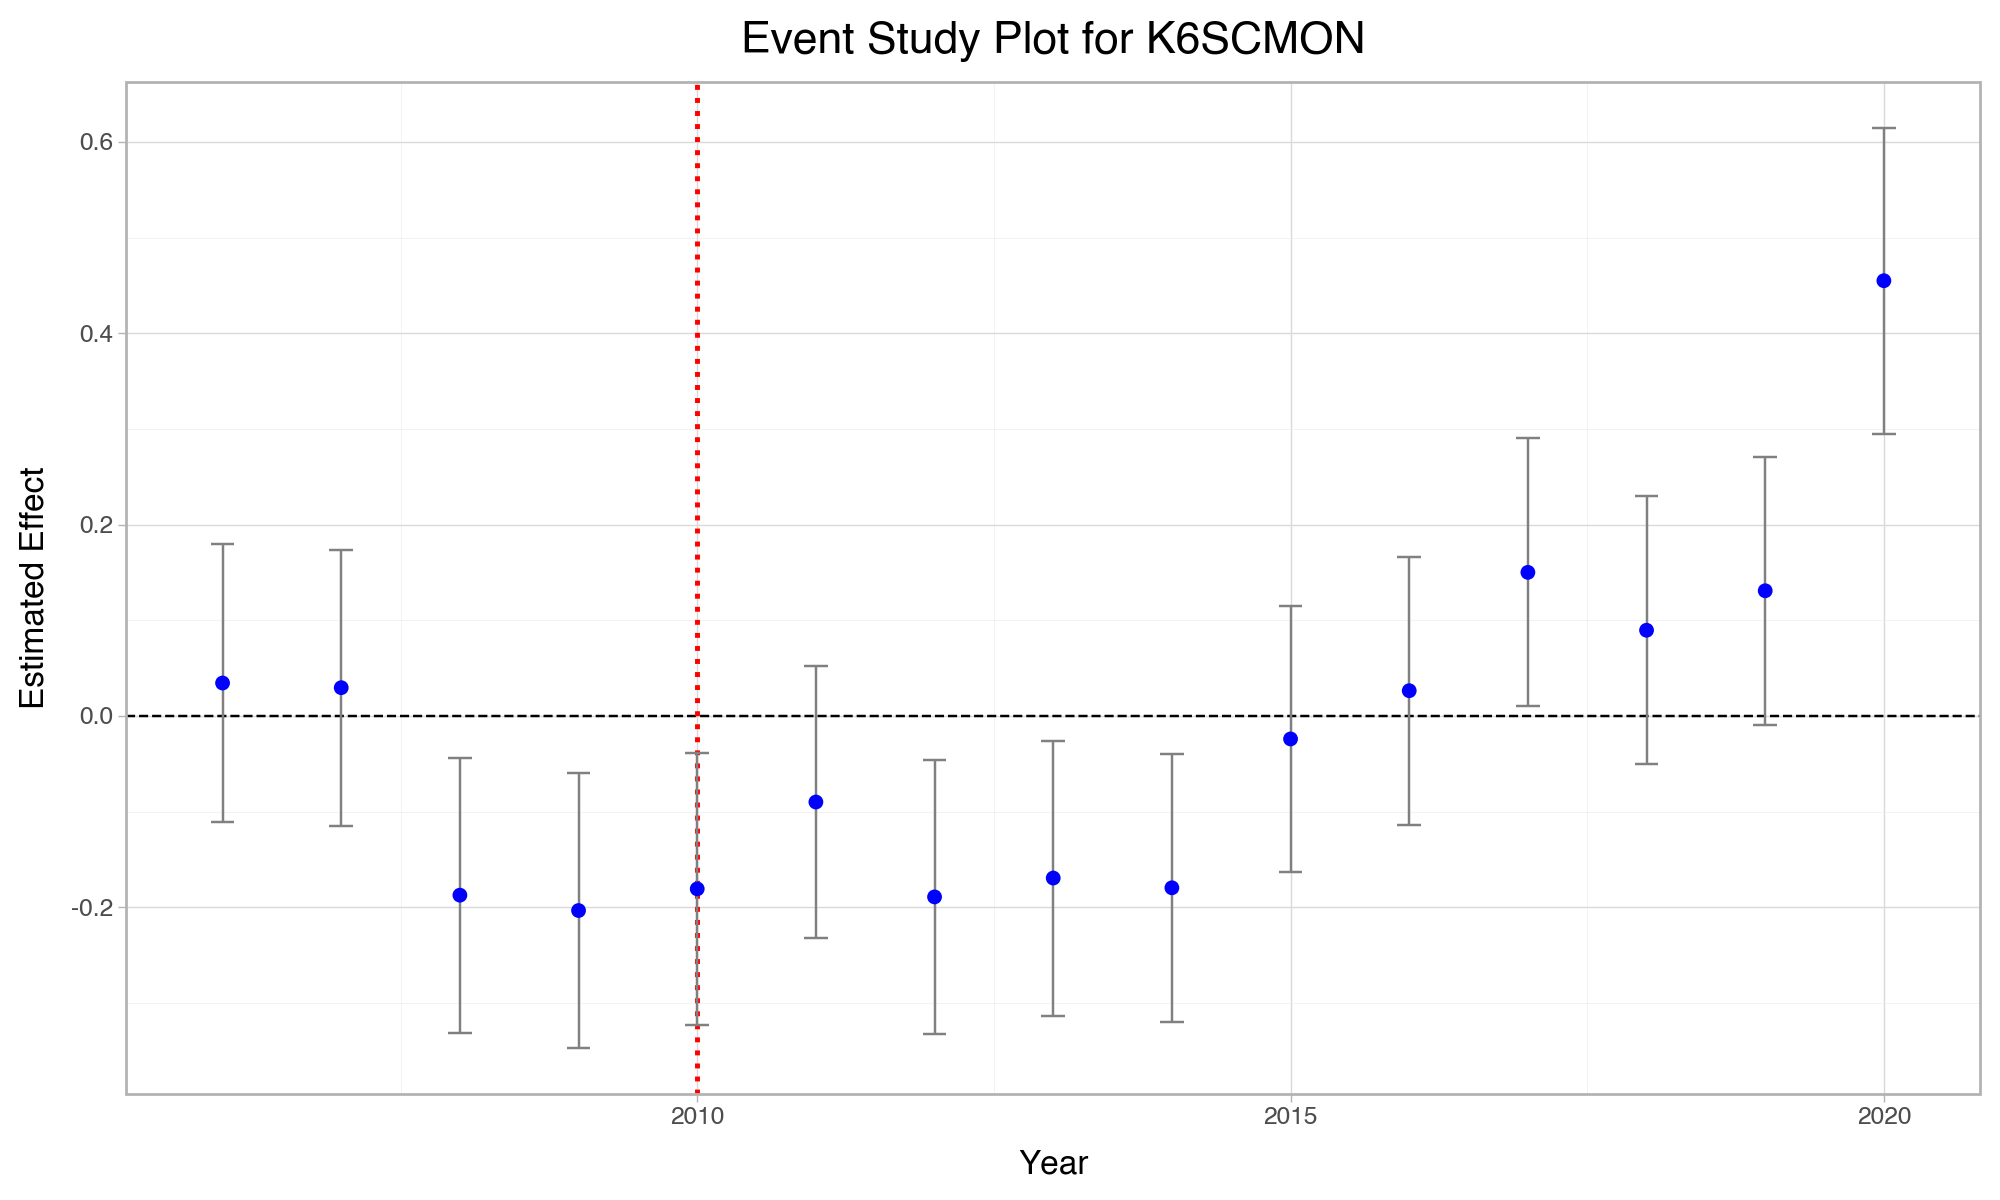

In [174]:
# Event Study Plot 생성
for y_var in y_vars:
    # 회귀식 정의
    formula = f"{y_var} ~ C(Treatment)*C(YEAR)"
    
    # OLS 회귀 분석
    reg = smf.ols(formula, data=df).fit()
    
    # 계수 필터링: 상호작용 계수만 추출
    interaction_params = reg.params.filter(like='C(Treatment)[T.1]:C(YEAR)')
    interaction_bse = reg.bse.filter(like='C(Treatment)[T.1]:C(YEAR)')
    
    # 연도 추출 (계수 이름에서 연도 파싱)
    years = interaction_params.index.str.extract(r'C\(YEAR\)\[T\.(\d+)\]')[0].astype(int)
    
    # 플롯 데이터 준비
    plot_data = pd.DataFrame({
        'year': years,
        'mean': interaction_params.values,
        'sd': interaction_bse.values
    }).sort_values('year')  # 연도 정렬
    
    plot_data['lb'] = plot_data['mean'] - 1.96 * plot_data['sd']
    plot_data['ub'] = plot_data['mean'] + 1.96 * plot_data['sd']
    
    # Event Study Plot 생성
    plot = (
        p.ggplot(plot_data, p.aes(x='year', y='mean')) +
        p.geom_hline(yintercept=0, linetype='dashed', color='black') +  # 수평선
        p.geom_vline(xintercept=2010, linetype='dotted', color='red', size=1) +  # Treatment 시점 수직선
        p.geom_errorbar(p.aes(ymin='lb', ymax='ub'), width=0.2, color='gray') +  # 에러 바
        p.geom_point(color='blue', size=2) +  # 데이터 포인트
        p.labs(
            title=f"Event Study Plot for {y_var}",
            x="Year",
            y="Estimated Effect"
        ) +
        theme_light() +
        p.theme(
            figure_size=(10, 6),
            plot_title=p.element_text(size=16, face='bold'),
            axis_title=p.element_text(size=12)
        )
    )
    plot.show()

# **Estimating Causal Effects**

## **Canonical DiD without covariates**

### **Model**

$$
Y_{it} = \beta_0 + \beta_1 \text{Treatment}_i + \beta_2 \text{Post}_t + \beta_3 (\text{Treatment}_i \times \text{Post}_t) + \epsilon_{it}
$$

1. $Y_{it}$:
   - 개체 $i$와 시간 $t$에서의 종속 변수 (예: `HEALTH`, `K6SCMON`, `AUPOPAMT`).

2. $\beta_0$:
   - 상수항(Intercept), 기본값.

3. $\beta_1 \text{Treatment}_i$:
   - 처치 집단과 비처치 집단 간의 (시간과 관련없는) 평균적 차이

4. $\beta_2 \text{Post}_t$:
   - 처치 이후 기간 ($\text{Post}_t = 1$)과 처치 이전 기간 ($\text{Post}_t = 0$) 간의 평균 차이
   - 이는 시간에 따른 외부 요인의 영향을 반영

5. $\beta_3 (\text{Treatment}_i \times \text{Post}_t)$:
   - Difference-in-Differences 상호작용 항으로, 처치 집단이 처치 이후에 경험하는 추가적인 효과
   - $\beta_3$가 는 우리가 추정하고자 하는 **처치의 인과적 효과**

6. $\epsilon_{it}$:
   - 오류항(Error term)으로, 관측되지 않은 요인이나 설명되지 않은 변화를 포함

---
- $\beta_3$가 처치의 인과적 효과(Causal Effect)를 추정
- $\beta_3 > 0$: 처치가 종속 변수 $Y$를 긍정적으로 변화시켰음을 의미
- $\beta_3 < 0$: 처치가 종속 변수 $Y$를 부정적으로 변화시켰음을 의미
- $\beta_3 = 0$: 처치가 종속 변수 $Y$에 영향을 미치지 않았음을 의미

### **Model Results**

In [175]:
def run_did_analysis(df, y_var):
    formula = f"{y_var} ~ Treatment + Post + Treatment*Post"
    model = smf.ols(formula, data=df).fit()
    print(f"\n=== DiD Analysis for {y_var} ===")
    print(model.summary())

# 각 Y 변수에 대해 DiD 분석 실행
for y_var in y_vars:
    run_did_analysis(df, y_var)


=== DiD Analysis for AUN_SUM ===
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     137.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           9.35e-89
Time:                        23:30:07   Log-Likelihood:            -1.6153e+06
No. Observations:              602949   AIC:                         3.231e+06
Df Residuals:                  602945   BIC:                         3.231e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

### **Export Tables**

In [176]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import os

def run_did_analysis(df, y_vars, output_dir="output"):
    # 결과 저장 디렉토리 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    models = []
    for y_var in y_vars:
        # DiD 모델 정의
        formula = f"{y_var} ~ Treatment + Post + Treatment*Post"
        model = smf.ols(formula, data=df).fit()
        models.append((y_var, model))
        
        # 결과 요약 출력
        print(f"\n=== DiD Analysis for {y_var} ===")
        print(model.summary())
    
    # Stargazer로 결과를 HTML로 저장
    stargazer = Stargazer([model for _, model in models])
    stargazer.title("Canonical DiD (without covariates) Results")
    stargazer.custom_columns([name for name, _ in models], [1] * len(models))
    stargazer.show_r2 = True
    stargazer.show_adj_r2 = True
    
    # HTML 파일 저장
    output_path = os.path.join(output_dir, "1. DiD_noCov_all.html")
    with open(output_path, "w") as f:
        f.write(stargazer.render_html())
    
    print(f"\nResults saved to {output_path}")

# DiD 분석 실행 및 HTML 저장
run_did_analysis(df, y_vars)



=== DiD Analysis for AUN_SUM ===
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     137.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           9.35e-89
Time:                        23:30:08   Log-Likelihood:            -1.6153e+06
No. Observations:              602949   AIC:                         3.231e+06
Df Residuals:                  602945   BIC:                         3.231e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

## **Canonical DiD without covariates**

## **Model**

$$
Y_{it} = \beta_0 + \beta_1 \text{Treatment}_i + \beta_2 \text{Post}_t + \beta_3 (\text{Treatment}_i \times \text{Post}_t) + \gamma \cdot X' + \epsilon_{it}
$$
1. $Y_{it}$:
   - 개체 $i$와 시간 $t$에서의 종속 변수 (예: `HEALTH`, `K6SCMON`, `AUPOPAMT`).

2. $\beta_0$:
   - 상수항(Intercept), 기본값.

3. $\beta_1 \text{Treatment}_i$:
   - 처치 집단과 비처치 집단 간의 (시간과 관련없는) 평균적 차이

4. $\beta_2 \text{Post}_t$:
   - 처치 이후 기간 ($\text{Post}_t = 1$)과 처치 이전 기간 ($\text{Post}_t = 0$) 간의 평균 차이
   - 이는 시간에 따른 외부 요인의 영향을 반영

5. $\beta_3 (\text{Treatment}_i \times \text{Post}_t)$:
   - Difference-in-Differences 상호작용 항으로, 처치 집단이 처치 이후에 경험하는 추가적인 효과
   - $\beta_3$가 는 우리가 추정하고자 하는 **처치의 인과적 효과**

6. $\gamma \cdot X'$:
   - $\gamma$: 공변량(통제변수)의 계수
   - $X'$: 공변량, 통제변수가 들어가는 항

7. $\epsilon_{it}$:
   - 오류항(Error term)으로, 관측되지 않은 요인이나 설명되지 않은 변화를 포함

---
- $\beta_3$가 처치의 인과적 효과(Causal Effect)를 추정
- $\beta_3 > 0$: 처치가 종속 변수 $Y$를 긍정적으로 변화시켰음을 의미
- $\beta_3 < 0$: 처치가 종속 변수 $Y$를 부정적으로 변화시켰음을 의미
- $\beta_3 = 0$: 처치가 종속 변수 $Y$에 영향을 미치지 않았음을 의미

### **Model Results**

In [177]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import os

# 공변량 조합 정의
covariate_combinations = [
    [],  # 공변량 없이
    ['AGE2', 'IRSEX'],  # 기본 인구통계 변수
    ['INCOME', 'IRMARIT'],  # 소득 및 결혼 상태
    ['EDUCCAT2', 'SERVICE'],  # 교육 수준 및 군 복무
    ['CG30EST', 'AL30EST', 'IRHHSIZ2'],  # 행동 요인 및 가구 정보
    ['AGE2', 'IRSEX', 'INCOME', 'IRMARIT', 'EDUCCAT2', 'SERVICE', 'CG30EST', 'AL30EST', 'IRHHSIZ2'],  # 모든 공변량
]

# 모든 변수 리스트
all_covariates = ['Intercept', 'Post', 'Treatment', 'Treatment:Post'] + [
    'AGE2', 'IRSEX', 'INCOME', 'IRMARIT', 'EDUCCAT2', 'SERVICE', 'CG30EST', 'AL30EST', 'IRHHSIZ2'
]

# 결과 저장 디렉토리
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 결과 저장
models = []

for covariates in covariate_combinations:
    # 공변량 추가
    covariate_formula = " + ".join(covariates) if covariates else ""
    formula = f"AUN_SUM ~ Treatment + Post + Treatment*Post"
    if covariate_formula:
        formula += f" + {covariate_formula}"
    
    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    models.append((covariates, model))

    # 결과 요약 출력
    covariate_str = ", ".join(covariates) if covariates else "No Covariates"
    print(f"\n=== DiD Analysis for AUN_SUM with Covariates: {covariate_str} ===")
    print(model.summary())

# Stargazer 테이블 생성
stargazer = Stargazer([model for _, model in models])
stargazer.title("Canonical DiD (with covariates) Results: AUN_SUM")

# 행 순서 재정렬: 모든 변수 포함
stargazer.covariate_order(all_covariates)

# 공변량 조합별 제목 설정
stargazer.custom_columns(
    ["No Covariates"] + [", ".join(cov) if cov else "No Covariates" for cov, _ in models[1:]],
    [1] * len(models)
)
stargazer.show_r2 = True
stargazer.show_adj_r2 = True

# HTML 파일 저장
output_path = os.path.join(output_dir, "2. DiD_Cov_AUN.html")
with open(output_path, "w") as f:
    f.write(stargazer.render_html())

print(f"\nResults saved to {output_path}")




=== DiD Analysis for AUN_SUM with Covariates: No Covariates ===
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     137.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           9.35e-89
Time:                        23:30:10   Log-Likelihood:            -1.6153e+06
No. Observations:              602949   AIC:                         3.231e+06
Df Residuals:                  602945   BIC:                         3.231e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### **Export Tables**

In [179]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import os

# 공변량 조합 정의
covariate_combinations = [
    [],  # 공변량 없이
    ['AGE2', 'IRSEX'],  # 기본 인구통계 변수
    ['INCOME', 'IRMARIT'],  # 소득 및 결혼 상태
    ['EDUCCAT2', 'SERVICE'],  # 교육 수준 및 군 복무
    ['CG30EST', 'AL30EST', 'IRHHSIZ2'],  # 행동 요인 및 가구 정보
    ['AGE2', 'IRSEX', 'INCOME', 'IRMARIT', 'EDUCCAT2', 'SERVICE', 'CG30EST', 'AL30EST', 'IRHHSIZ2'],  # 모든 공변량
]

# 모든 변수 리스트
all_covariates = ['Intercept', 'Post', 'Treatment', 'Treatment:Post'] + [
    'AGE2', 'IRSEX', 'INCOME', 'IRMARIT', 'EDUCCAT2', 'SERVICE', 'CG30EST', 'AL30EST', 'IRHHSIZ2'
]

# 결과 저장 디렉토리
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 결과 저장
models = []

for covariates in covariate_combinations:
    # 공변량 추가
    covariate_formula = " + ".join(covariates) if covariates else ""
    formula = f"K6SCMON ~ Treatment + Post + Treatment*Post"
    if covariate_formula:
        formula += f" + {covariate_formula}"
    
    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    models.append((covariates, model))

    # 결과 요약 출력
    covariate_str = ", ".join(covariates) if covariates else "No Covariates"
    print(f"\n=== DiD Analysis for K6SCMON with Covariates: {covariate_str} ===")
    print(model.summary())

# Stargazer 테이블 생성
stargazer = Stargazer([model for _, model in models])
stargazer.title("Canonical DiD (with covariates) Results: K6SCMON")

# 행 순서 재정렬: 모든 변수 포함
stargazer.covariate_order(all_covariates)

# 공변량 조합별 제목 설정
stargazer.custom_columns(
    ["No Covariates"] + [", ".join(cov) if cov else "No Covariates" for cov, _ in models[1:]],
    [1] * len(models)
)
stargazer.show_r2 = True
stargazer.show_adj_r2 = True

# HTML 파일 저장
output_path = os.path.join(output_dir, "3. DiD_Cov_K6.html")
with open(output_path, "w") as f:
    f.write(stargazer.render_html())

print(f"\nResults saved to {output_path}")



=== DiD Analysis for K6SCMON with Covariates: No Covariates ===
                            OLS Regression Results                            
Dep. Variable:                K6SCMON   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2942.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:30:16   Log-Likelihood:            -1.8178e+06
No. Observations:              602949   AIC:                         3.636e+06
Df Residuals:                  602945   BIC:                         3.636e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

# **Estimating HTE**

## **by gender group**

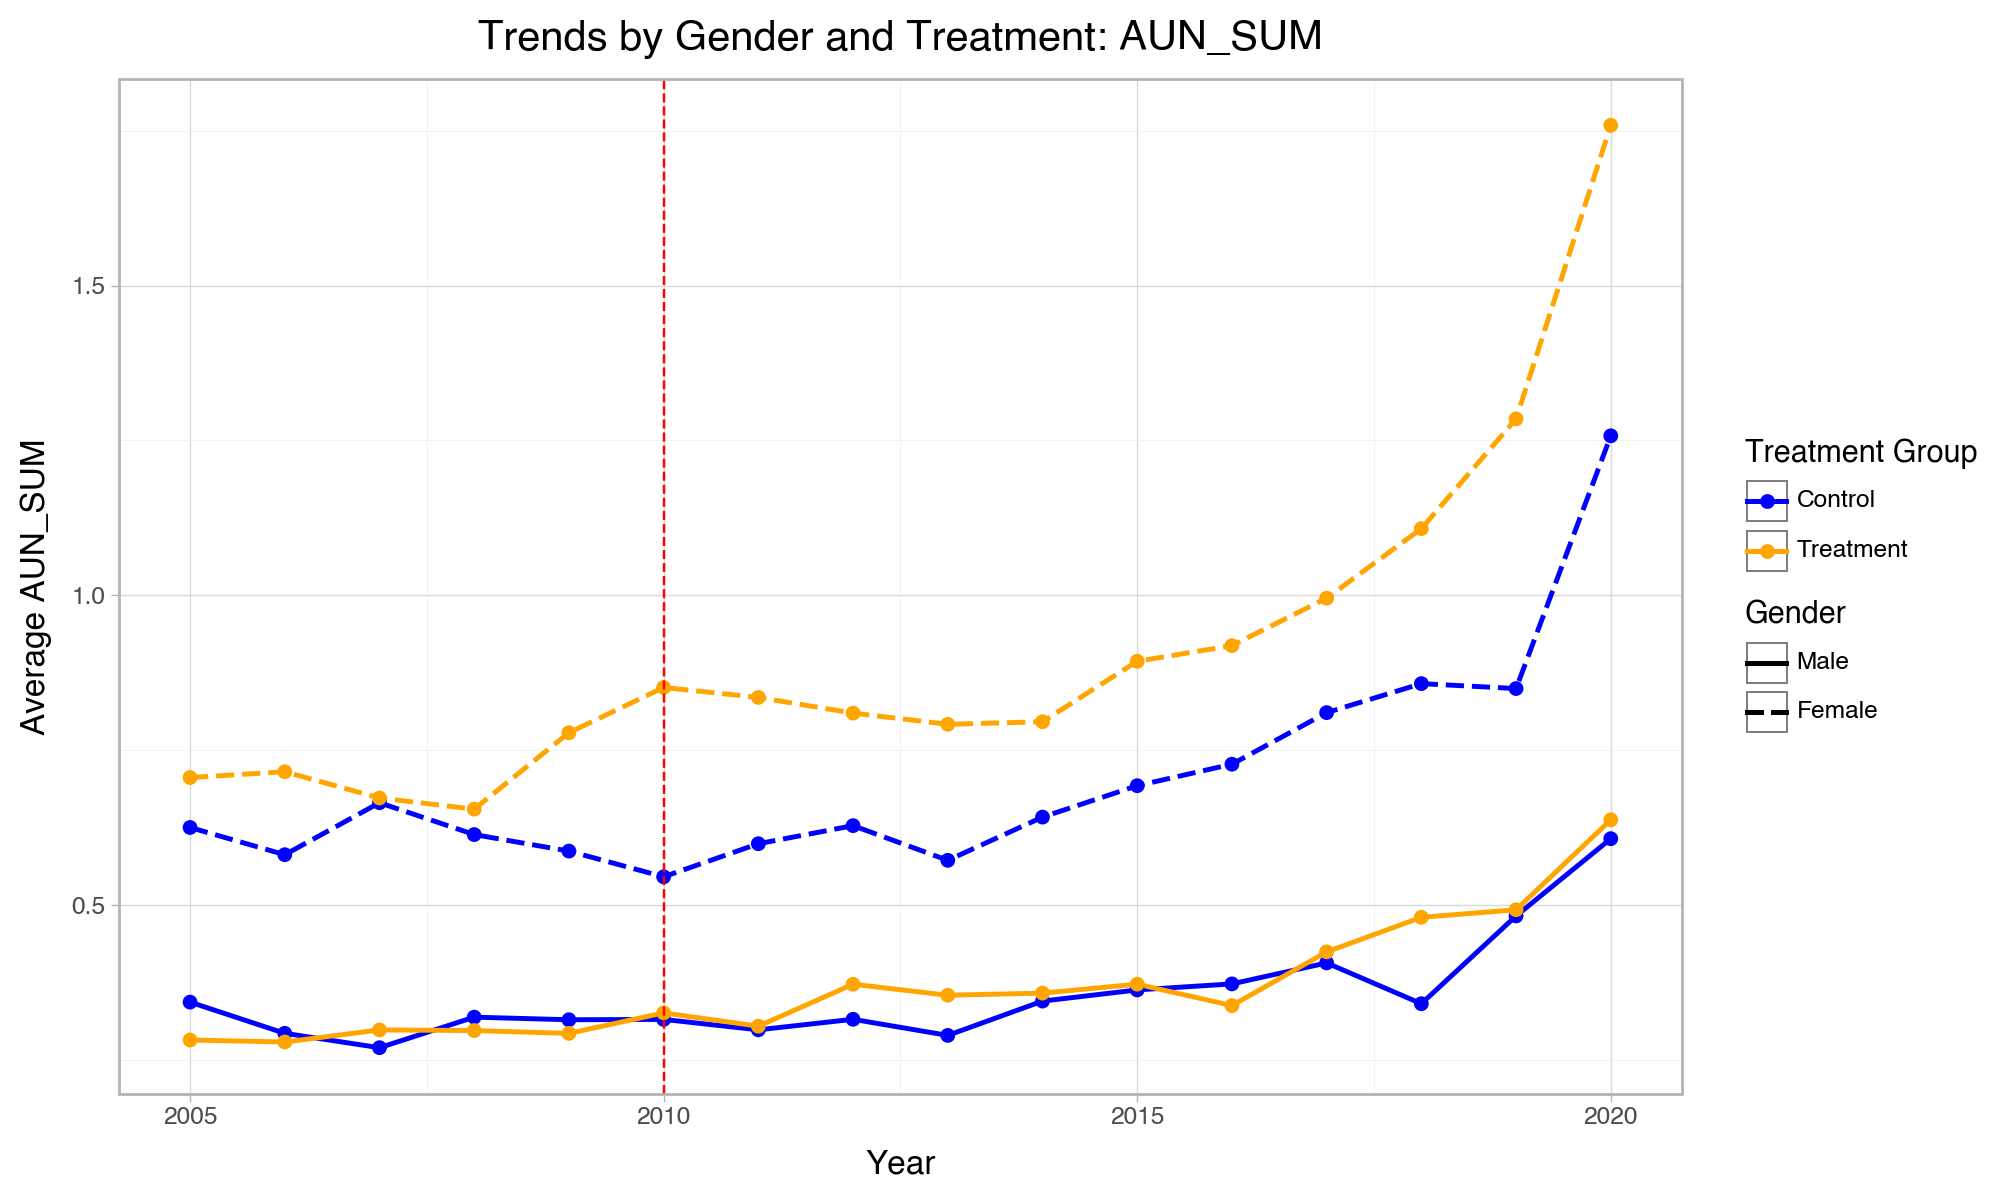

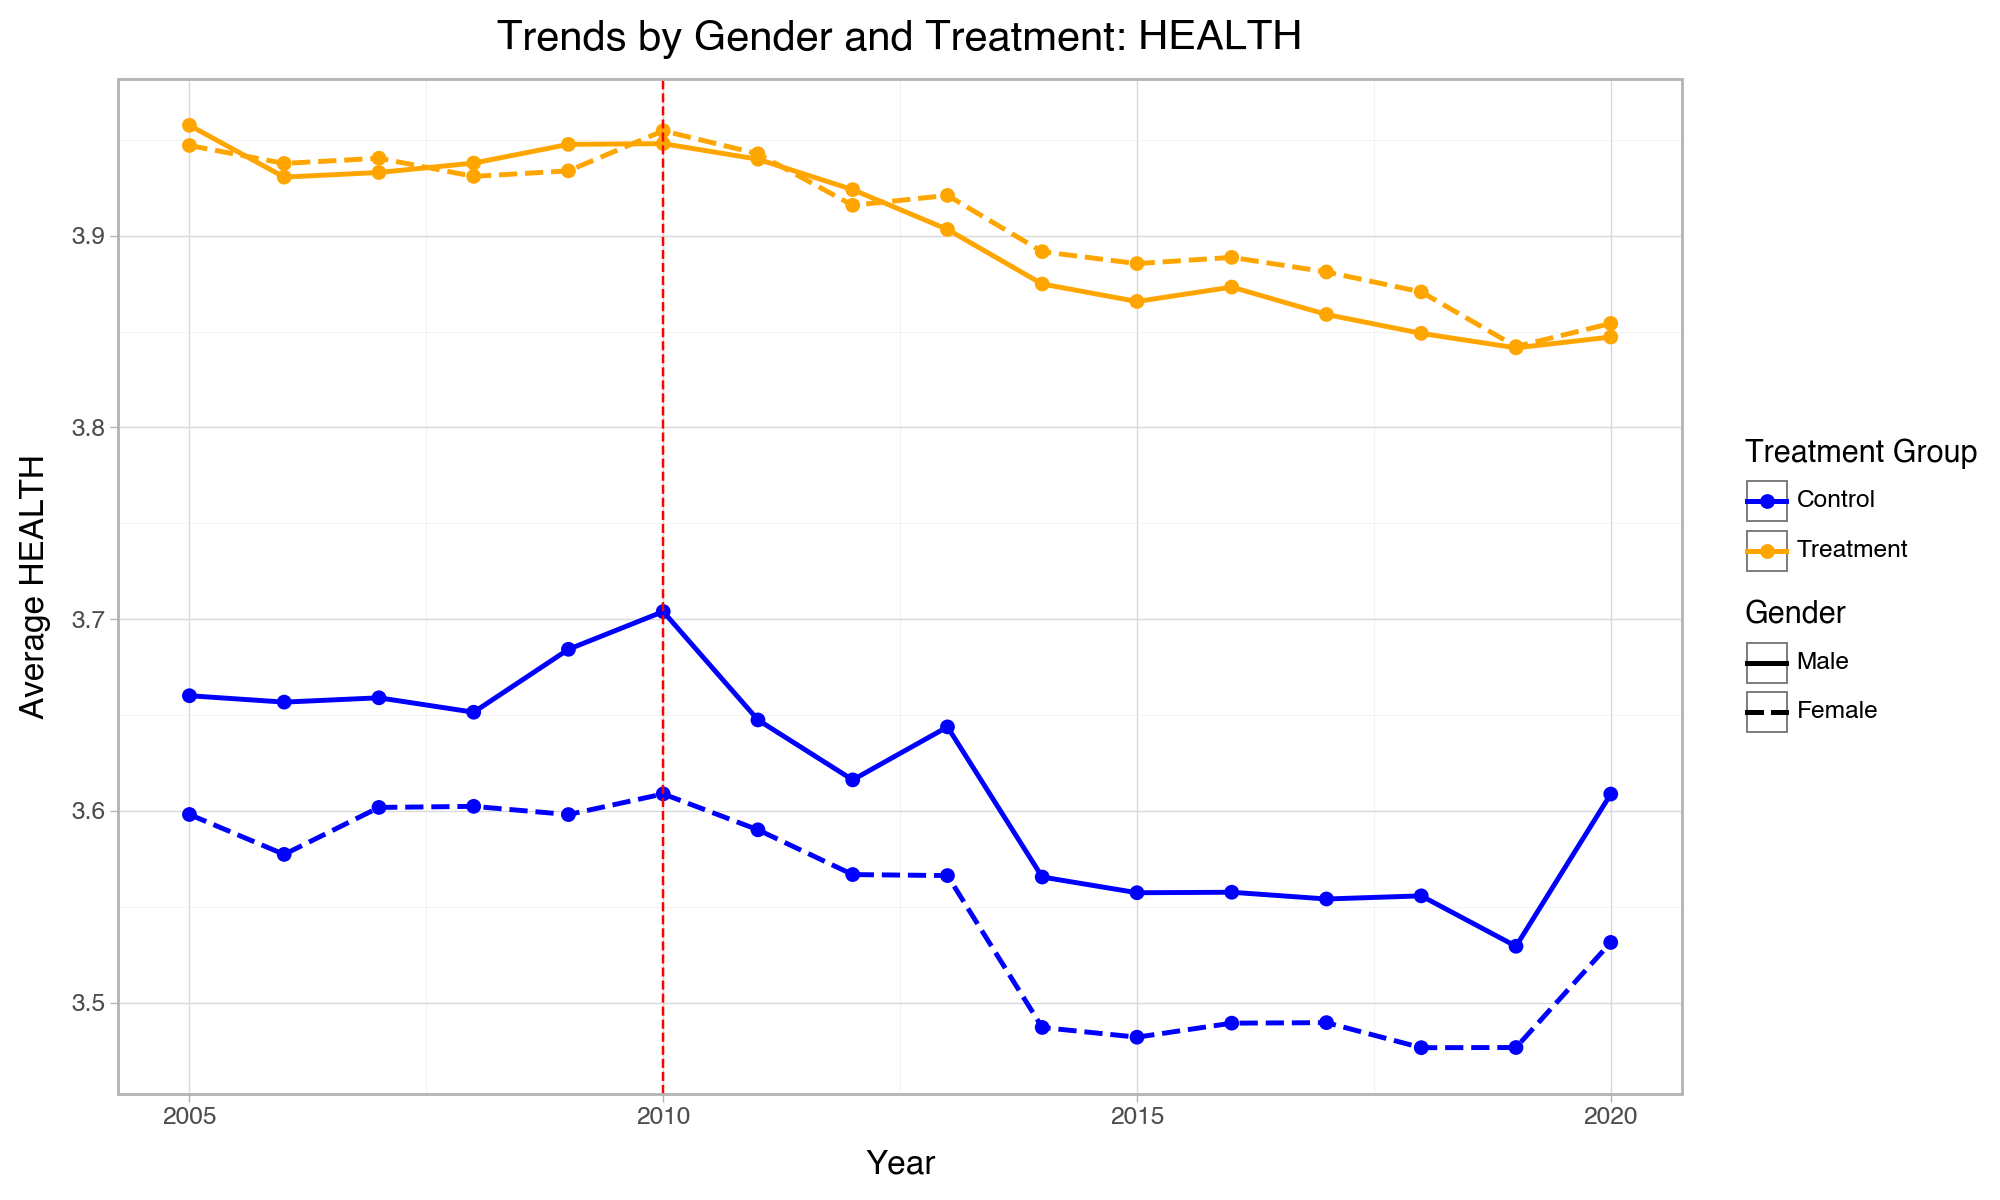

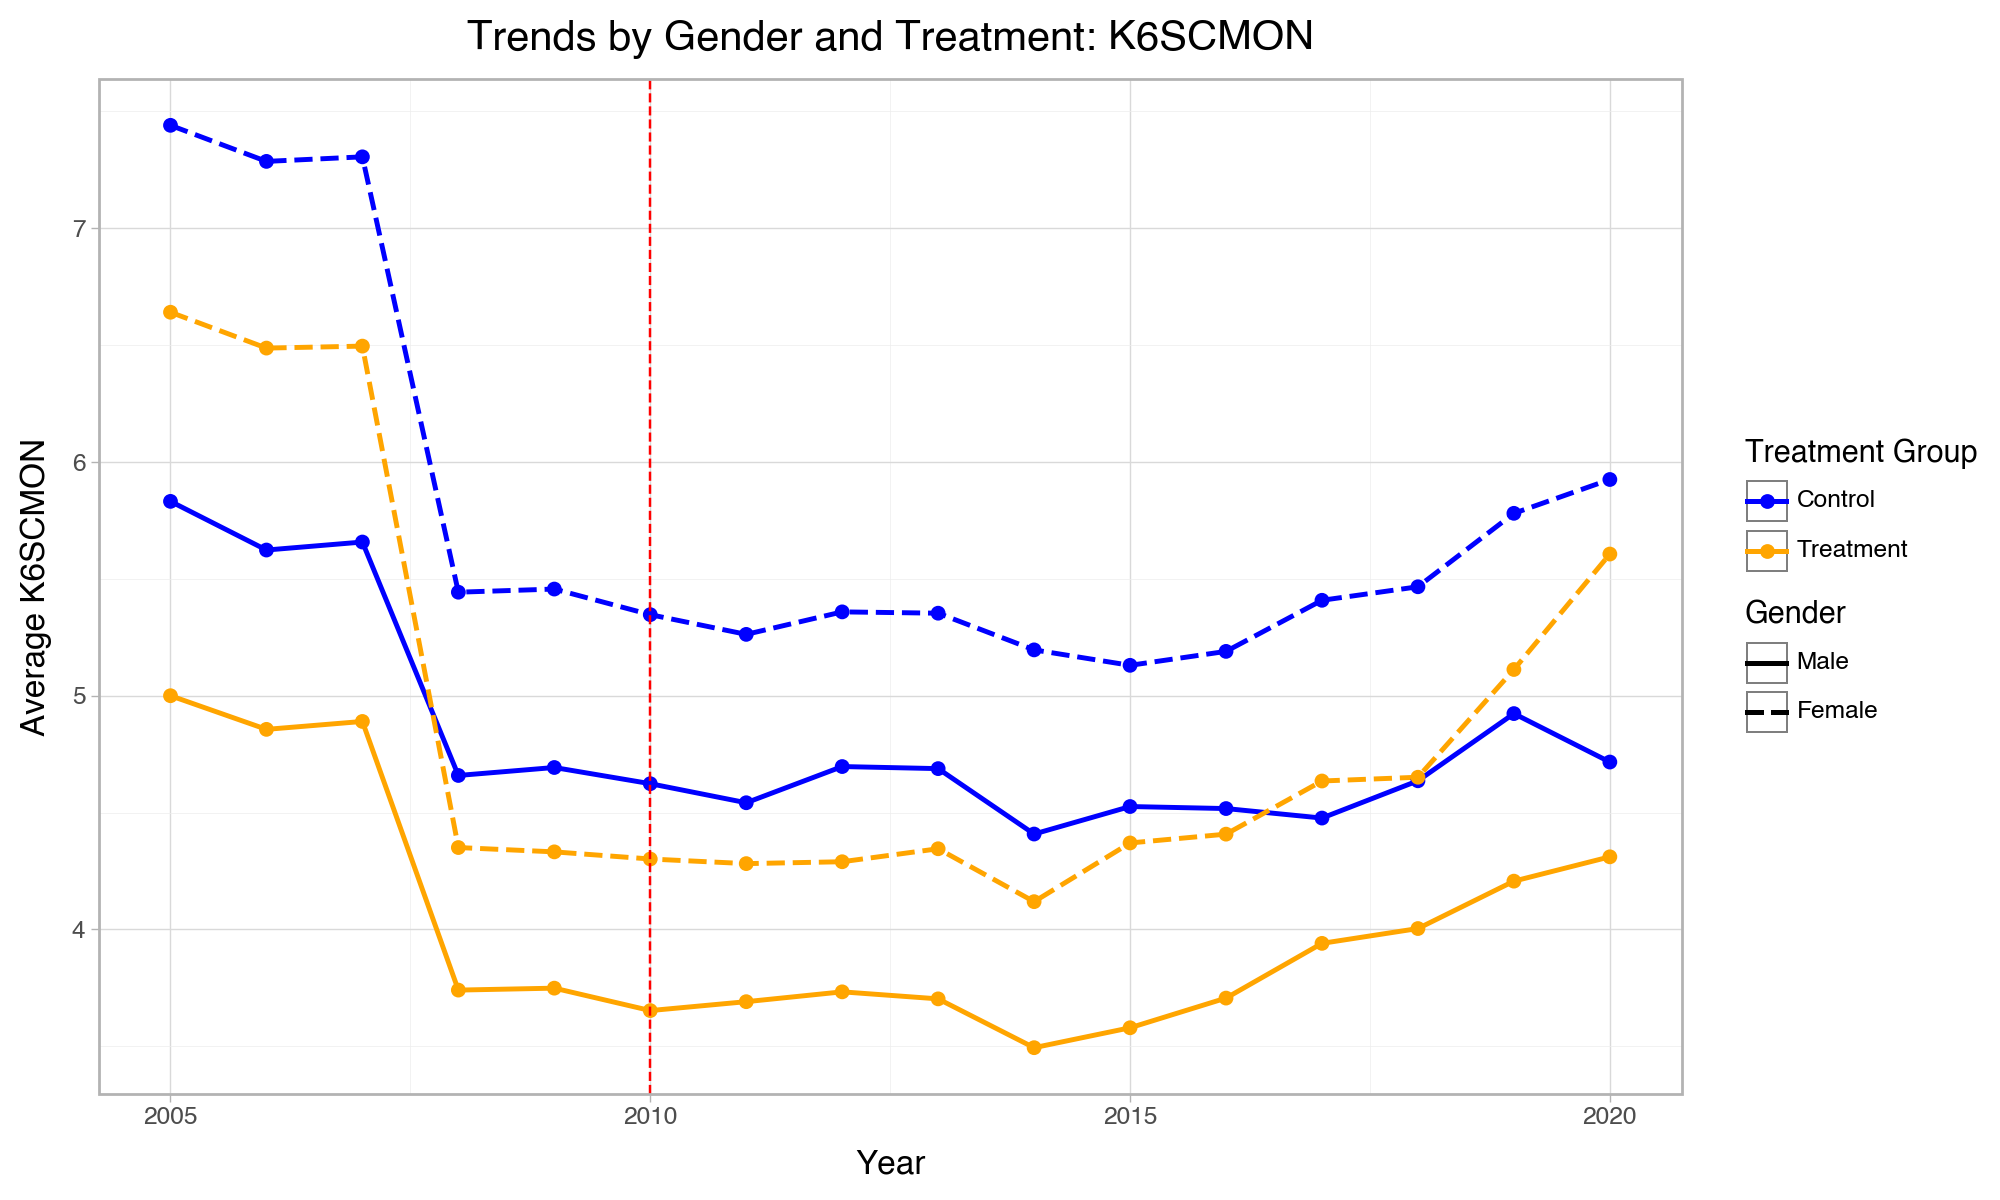

In [180]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, scale_color_manual, scale_linetype_manual, theme_light, element_text, geom_vline

# 그룹별 데이터 준비
grouped_data = (
    df.groupby(['YEAR', 'Treatment', 'IRSEX'])[y_vars]
    .mean()
    .reset_index()
    .melt(
        id_vars=['YEAR', 'Treatment', 'IRSEX'], 
        value_vars=y_vars, 
        var_name='Variable', 
        value_name='Value'
    )
)

# 성별 및 처리 여부를 구분하여 시각화
for y_var in y_vars:
    plot = (
        ggplot(grouped_data[grouped_data['Variable'] == y_var], 
               aes(x='YEAR', y='Value', color='factor(Treatment)', linetype='factor(IRSEX)')) +
        geom_line(size=1) +
        geom_point(size=2) +
        geom_vline(xintercept=2010, linetype='dashed', color='red') +  # 2010년 수직선
        labs(
            title=f'Trends by Gender and Treatment: {y_var}',
            x='Year',
            y=f'Average {y_var}',
            color='Treatment Group',
            linetype='Gender'
        ) +
        scale_color_manual(values=['blue', 'orange'], labels=['Control', 'Treatment']) +
        scale_linetype_manual(values=['solid', 'dashed'], labels=['Male', 'Female']) +
        theme_light() +
        theme(
            figure_size=(10, 6),
            plot_title=element_text(size=15),
            axis_title=element_text(size=12)
        )
    )
    plot.show()



Running Event Study for AUN_SUM


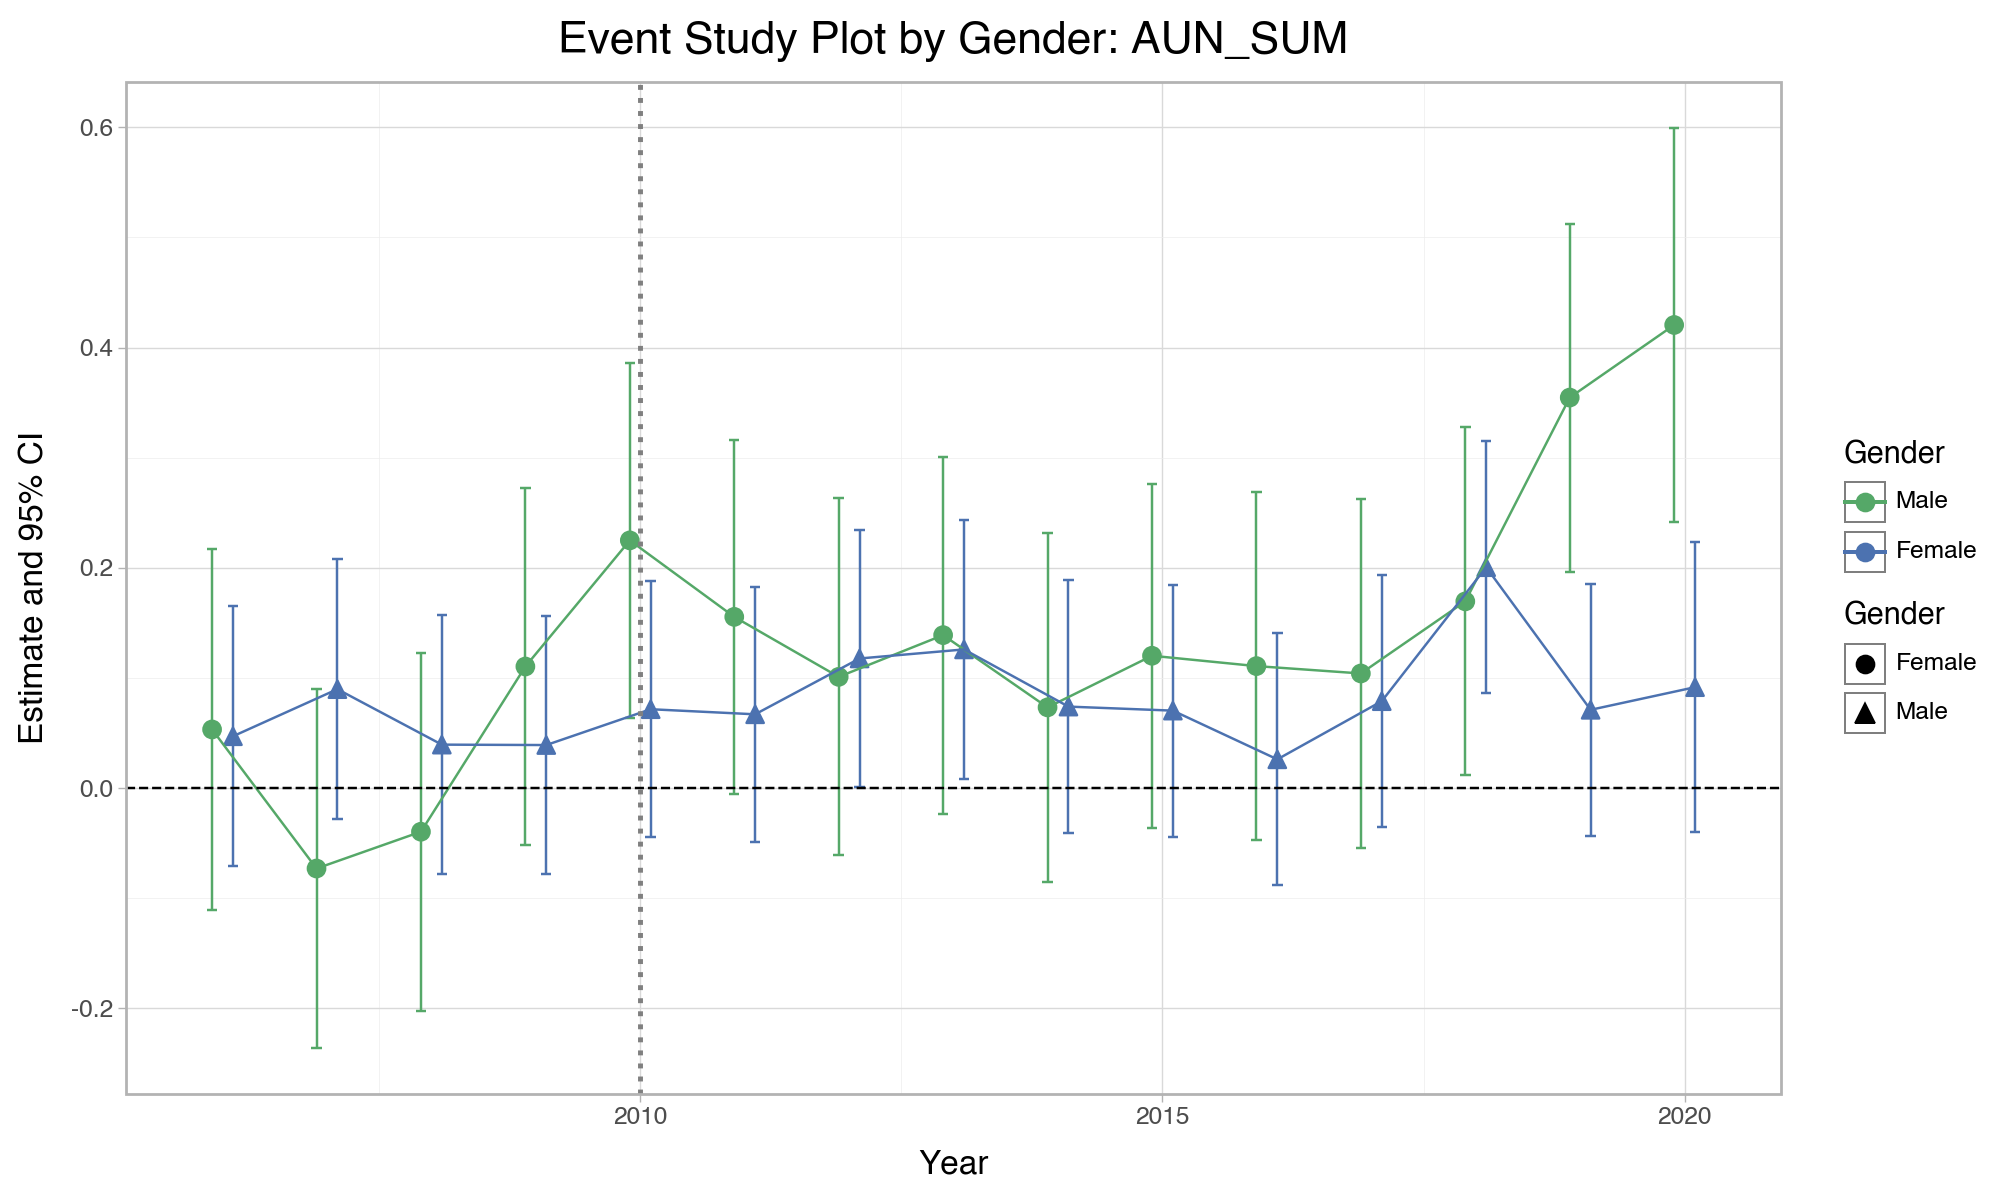

Running Event Study for HEALTH


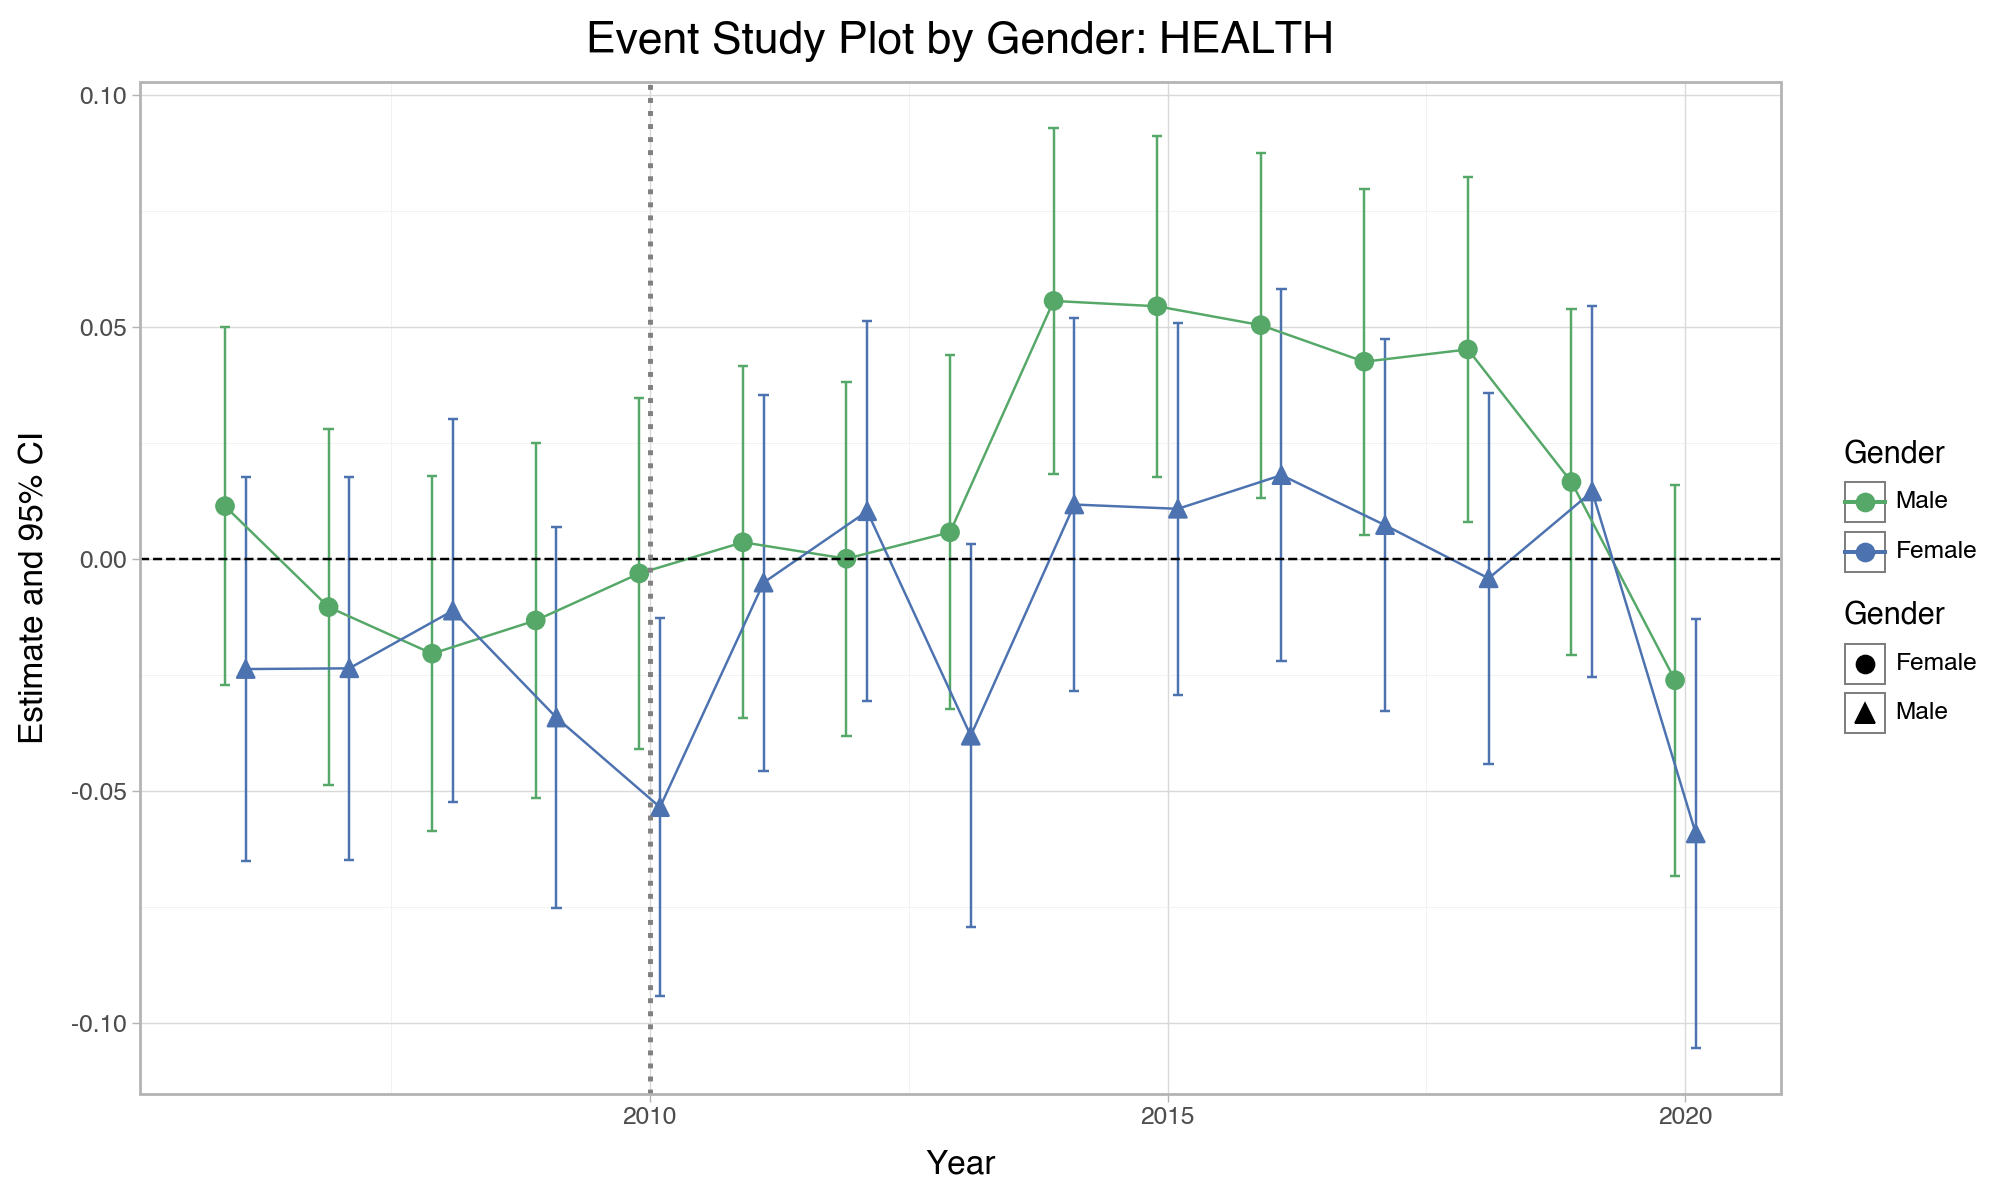

Running Event Study for K6SCMON


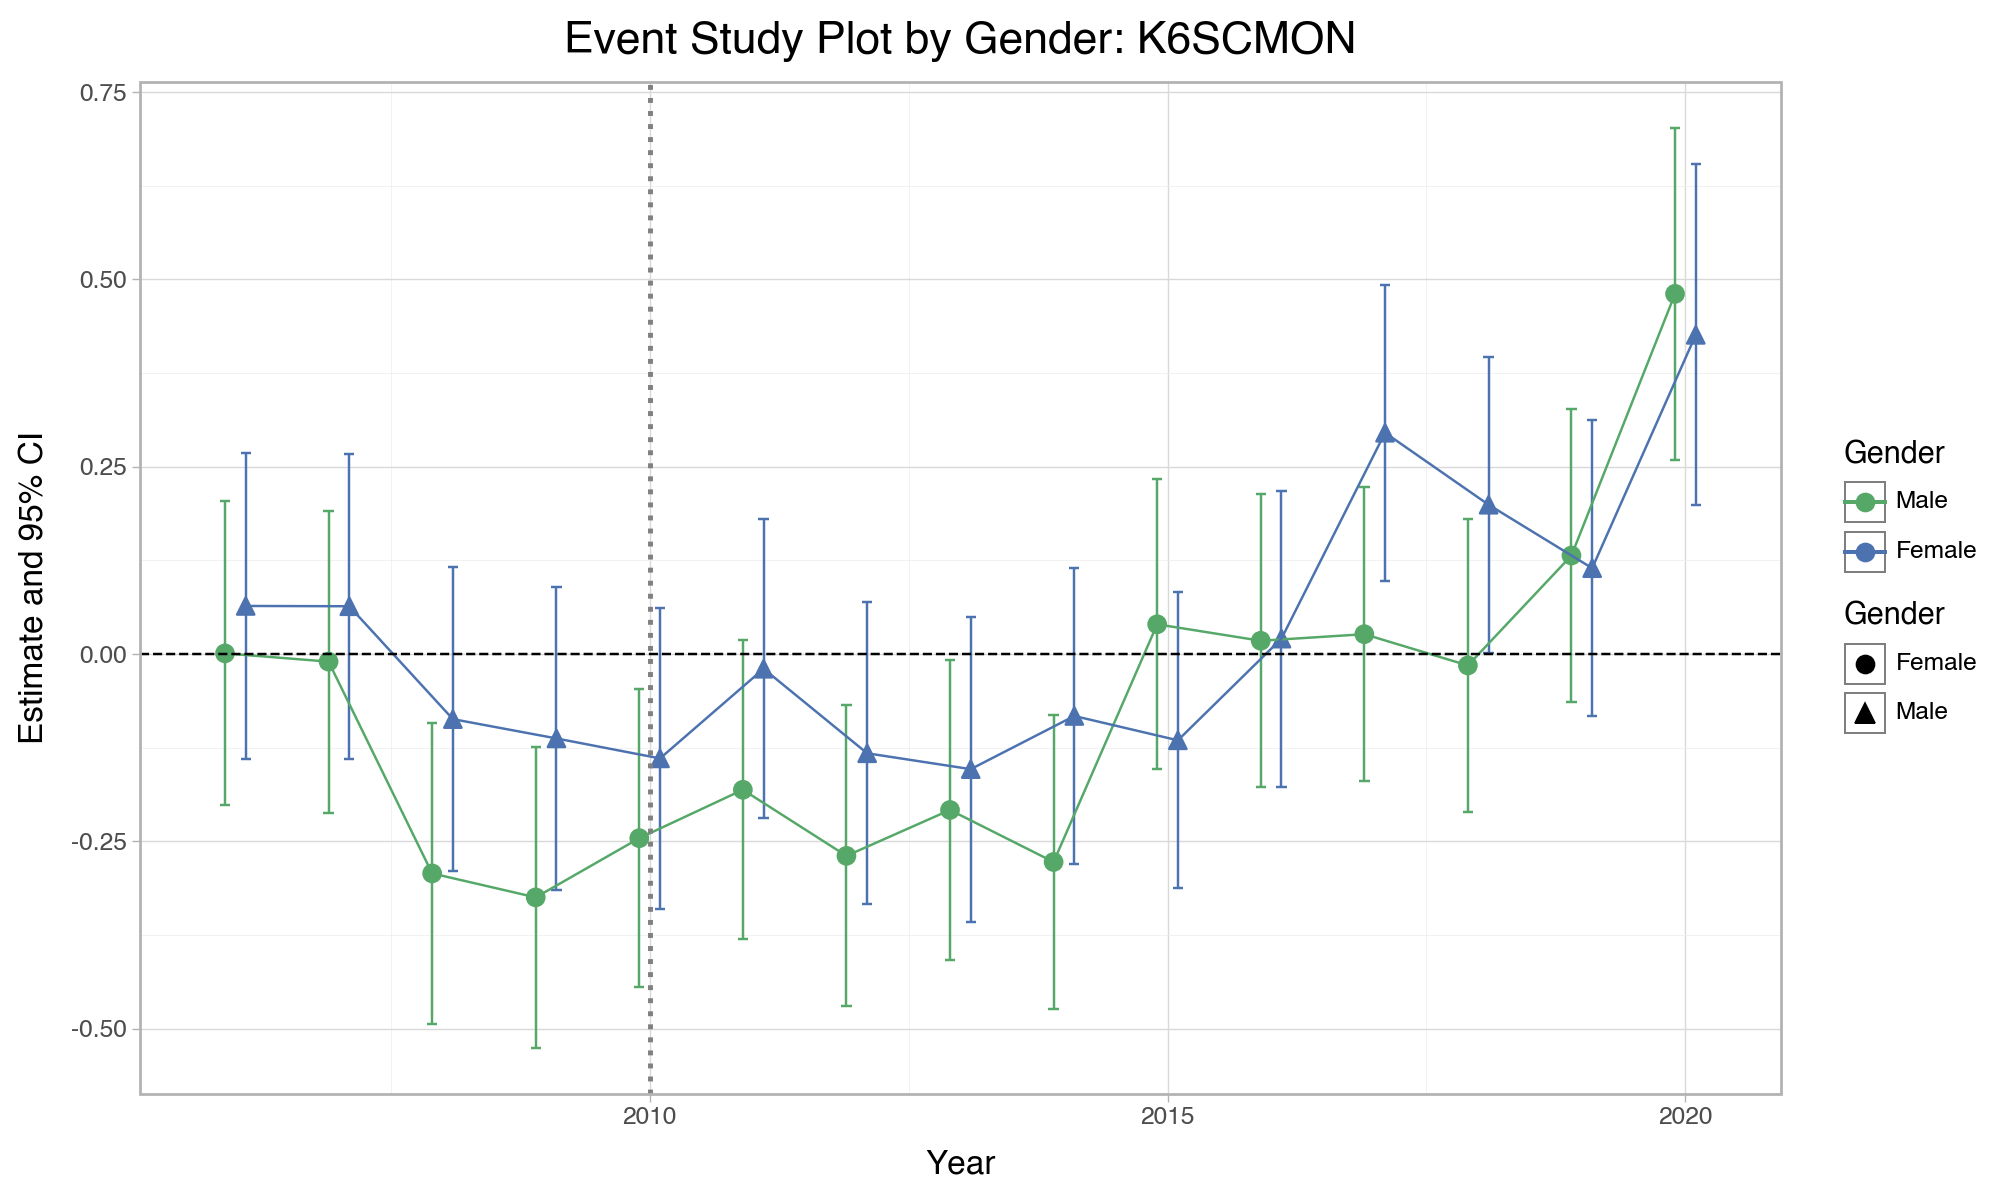

In [181]:
from plotnine import ggplot, aes, geom_point, geom_errorbar, geom_line, geom_hline, geom_vline, labs, scale_color_manual, position_dodge, theme_light, element_text

# Position dodge 설정 (겹치지 않게 이동)
dodge = position_dodge(width=0.4)

y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]

for y_var in y_vars:
    print(f"Running Event Study for {y_var}")

    # 남성 데이터
    male_data = df[df['IRSEX'] == 1]
    male_model = smf.ols(f"{y_var} ~ C(Treatment)*C(YEAR)", data=male_data).fit()
    male_interactions = male_model.params.filter(like="C(Treatment)[T.1]:C(YEAR)")
    male_bse = male_model.bse.filter(like="C(Treatment)[T.1]:C(YEAR)")
    male_years = male_interactions.index.str.extract(r"C\(YEAR\)\[T\.(\d+)\]")[0].astype(int)
    male_plot_data = pd.DataFrame({
        "year": male_years,
        "estimate": male_interactions.values,
        "lb": male_interactions.values - 1.96 * male_bse.values,
        "ub": male_interactions.values + 1.96 * male_bse.values,
        "group": "Male"
    })

    # 여성 데이터
    female_data = df[df['IRSEX'] == 2]
    female_model = smf.ols(f"{y_var} ~ C(Treatment)*C(YEAR)", data=female_data).fit()
    female_interactions = female_model.params.filter(like="C(Treatment)[T.1]:C(YEAR)")
    female_bse = female_model.bse.filter(like="C(Treatment)[T.1]:C(YEAR)")
    female_years = female_interactions.index.str.extract(r"C\(YEAR\)\[T\.(\d+)\]")[0].astype(int)
    female_plot_data = pd.DataFrame({
        "year": female_years,
        "estimate": female_interactions.values,
        "lb": female_interactions.values - 1.96 * female_bse.values,
        "ub": female_interactions.values + 1.96 * female_bse.values,
        "group": "Female"
    })

    # 남성과 여성 데이터 결합
    plot_data = pd.concat([male_plot_data, female_plot_data])

    # 플롯 생성
    plot = (
        ggplot(plot_data, aes(x="year", y="estimate", color="group", shape="group")) +
        geom_point(size=3, position=dodge) +  # 겹치지 않게 이동
        geom_errorbar(aes(ymin="lb", ymax="ub"), width=0.2, position=dodge) +  # 신뢰구간도 이동
        geom_line(position=dodge) +  # 선도 이동
        geom_hline(yintercept=0, linetype="dashed", color="black") +  # 수평선 (y=0)
        geom_vline(xintercept=2010, linetype="dotted", color="gray", size=1) +  # 수직선 (처치 시점)
        labs(
            title=f"Event Study Plot by Gender: {y_var}",
            x="Year",
            y="Estimate and 95% CI",
            color="Gender",
            shape="Gender"
        ) +
        scale_color_manual(values=["#55A868", "#4C72B0"], labels=["Male", "Female"]) +
        theme_light() +
        theme(
            figure_size=(10, 6),
            plot_title=element_text(size=16, face="bold"),
            axis_title=element_text(size=12)
        )
    )
    plot.show()


In [182]:
import statsmodels.formula.api as smf
import pandas as pd

# 결과 저장을 위한 리스트
ddd_results = []

# 각 종속 변수에 대해 DDD 분석
y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]
for y_var in y_vars:
    print(f"Running DDD for {y_var}")
    
    # DDD 모델 정의
    formula = f"{y_var} ~ Treatment + Post + IRSEX + Treatment*Post + Treatment*IRSEX + Post*IRSEX + Treatment*Post*IRSEX"
    
    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    ddd_results.append(model)
    
    # 결과 출력
    print(model.summary())


Running DDD for AUN_SUM
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     430.8
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:30:30   Log-Likelihood:            -1.6140e+06
No. Observations:              602949   AIC:                         3.228e+06
Df Residuals:                  602941   BIC:                         3.228e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercep

In [183]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import os

# 결과 저장 디렉토리
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 결과 저장을 위한 리스트
ddd_results = []
y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]

for y_var in y_vars:
    print(f"Running DDD for {y_var}")
    
    # DDD 모델 정의
    formula = f"{y_var} ~ Treatment + Post + IRSEX + Treatment*Post + Treatment*IRSEX + Post*IRSEX + Treatment*Post*IRSEX"
    
    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    ddd_results.append((y_var, model))
    
    # 결과 요약 출력
    print(model.summary())

# Stargazer 테이블 생성
stargazer = Stargazer([model for _, model in ddd_results])
stargazer.title("DDD Results: HTE by Gender")
stargazer.custom_columns(
    [y_var for y_var, _ in ddd_results],  # 종속 변수 이름
    [1] * len(ddd_results)  # 각 열의 폭
)
stargazer.show_r2 = True
stargazer.show_adj_r2 = True
stargazer.significant_digits(3)

# 결과를 HTML 파일로 저장
output_path = os.path.join(output_dir, "ddd_results_hte_gender.html")
with open(output_path, "w") as f:
    f.write(stargazer.render_html())

print(f"\nDDD Results saved to {output_path}")



Running DDD for AUN_SUM
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     430.8
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:30:31   Log-Likelihood:            -1.6140e+06
No. Observations:              602949   AIC:                         3.228e+06
Df Residuals:                  602941   BIC:                         3.228e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercep

## **by income group**

In [184]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import os

# 결과 저장 디렉토리
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 결과 저장을 위한 리스트
ddd_results = []
y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]

for y_var in y_vars:
    print(f"Running DDD for {y_var}")
    
    # DDD 모델 정의
    formula = f"{y_var} ~ Treatment + Post + INCOME + Treatment*Post + Treatment*INCOME + Post*INCOME + Treatment*Post*INCOME"
    
    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    ddd_results.append((y_var, model))
    
    # 결과 요약 출력
    print(model.summary())

# Stargazer 테이블 생성
stargazer = Stargazer([model for _, model in ddd_results])
stargazer.title("DDD Results: HTE by Gender")
stargazer.custom_columns(
    [y_var for y_var, _ in ddd_results],  # 종속 변수 이름
    [1] * len(ddd_results)  # 각 열의 폭
)
stargazer.show_r2 = True
stargazer.show_adj_r2 = True
stargazer.significant_digits(3)

# 결과를 HTML 파일로 저장
output_path = os.path.join(output_dir, "ddd_results_hte_income.html")
with open(output_path, "w") as f:
    f.write(stargazer.render_html())

print(f"\nDDD Results saved to {output_path}")

Running DDD for AUN_SUM
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     63.51
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           7.06e-92
Time:                        23:30:33   Log-Likelihood:            -1.6153e+06
No. Observations:              602949   AIC:                         3.231e+06
Df Residuals:                  602941   BIC:                         3.231e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Interc

In [185]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import os
import pandas as pd

# 결과 저장 디렉토리
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 결과 저장을 위한 리스트
ddd_results = []
ate_summary_list = []  # ATE 요약 저장

y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]

for y_var in y_vars:
    print(f"Running DDD for {y_var}")

    # DDD 모델 정의
    formula = (
        f"{y_var} ~ Treatment + Post + IRSEX + "
        "Treatment*Post + Treatment*IRSEX + Post*IRSEX + Treatment*Post*IRSEX"
    )

    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    ddd_results.append((y_var, model))

    # 결과 요약 출력
    print(model.summary())

    # -----------------------
    # ATE(남성, 여성) 계산
    # -----------------------
    # 계수 이름이 정확히 아래와 같아야 함
    beta4_name = "Treatment:Post"          # 남성 ATE
    beta7_name = "Treatment:Post:IRSEX"    # 여성과의 차이

    # 존재 확인
    if (beta4_name not in model.params) or (beta7_name not in model.params):
        print(f"*** Warning: {beta4_name} or {beta7_name} not found in model params for {y_var}. ***")
        male_ate = None
        female_ate = None
        hte = None
    else:
        beta4 = model.params[beta4_name]
        beta7 = model.params[beta7_name]
        male_ate = beta4
        female_ate = beta4 + beta7
        hte = beta7

    # ate_summary_list에 요약 저장
    ate_summary_list.append({
        "Dependent Variable": y_var,
        "Male ATE": male_ate,
        "Female ATE": female_ate,
        "HTE (F - M)": hte
    })

# --------------------------------------------------
# (A) DDD 회귀 결과를 Stargazer로 HTML 저장
# --------------------------------------------------
stargazer = Stargazer([model for _, model in ddd_results])
stargazer.title("DDD Results: HTE by Gender")
stargazer.custom_columns(
    [y_var for y_var, _ in ddd_results],  # 종속 변수 이름
    [1] * len(ddd_results)  # 각 열의 폭(1씩)
)
stargazer.show_r2 = True
stargazer.show_adj_r2 = True
stargazer.significant_digits(3)

ddd_reg_path = os.path.join(output_dir, "ddd_results_hte_gender.html")
with open(ddd_reg_path, "w") as f:
    f.write(stargazer.render_html())

print(f"\nDDD regression results saved to {ddd_reg_path}")

# --------------------------------------------------
# (B) ATE & HTE 요약 테이블을 별도로 HTML 저장
# --------------------------------------------------
ate_df = pd.DataFrame(ate_summary_list, columns=["Dependent Variable", "Male ATE", "Female ATE", "HTE (F - M)"])

ate_html_path = os.path.join(output_dir, "ddd_ate_summary.html")
ate_df_html = ate_df.to_html(index=False, float_format="{:.3f}".format)
with open(ate_html_path, "w") as f:
    f.write("<h2>ATE & HTE Summary by Gender (DDD)</h2>")
    f.write(ate_df_html)

print(f"ATE summary table saved to {ate_html_path}")

Running DDD for AUN_SUM
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     430.8
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:30:35   Log-Likelihood:            -1.6140e+06
No. Observations:              602949   AIC:                         3.228e+06
Df Residuals:                  602941   BIC:                         3.228e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercep

In [188]:
import os
import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# 1. INCOME 재매핑 함수
def remap_income(x):
    # 부동소수점 오차를 고려하여 근사값 비교
    if abs(x - 0.0) < 1e-7:
        return 1
    elif abs(x - 0.3333333) < 1e-5:
        return 2
    elif abs(x - 0.6666667) < 1e-5:
        return 3
    elif abs(x - 1.0) < 1e-7:
        return 4
    else:
        return float('nan')

# 2. INCOME 컬럼 재매핑
df["INCOME_mapped"] = df["INCOME"].apply(remap_income)
df["INCOME_mapped"] = pd.Categorical(
    df["INCOME_mapped"],
    categories=[1, 2, 3, 4],  # 원하는 순서대로
    ordered=True
)

# 분석할 종속 변수 목록
y_vars = ["AUN_SUM", "HEALTH", "K6SCMON"]

# 결과 저장 디렉토리
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# (A) 회귀 결과(모델)를 저장할 리스트
ddd_models = []  # [(y_var, model), ...]

# (B) 그룹별 ATE(HTE) 요약을 저장할 리스트
ate_summary_rows = []

# 3. DDD 모델 추정
for y_var in y_vars:
    # DDD 모델 식
    formula = f"""
        {y_var} ~ Treatment + Post + C(INCOME_mapped)
        + Treatment*Post
        + Treatment*C(INCOME_mapped)
        + Post*C(INCOME_mapped)
        + Treatment*Post*C(INCOME_mapped)
    """
    # 모델 적합
    model = smf.ols(formula, data=df).fit()
    ddd_models.append((y_var, model))

    print(f"\n=== DDD for {y_var} ===")
    print(model.summary())

    # 3.1 계수 추출
    # 기준 그룹(Income=1)의 DiD 계수
    beta_tp_name = "Treatment:Post"
    beta_tp = model.params.get(beta_tp_name, float('nan'))

    # 추가 항: Treatment:Post:C(INCOME_mapped)[T.x]
    beta_tp2 = model.params.get("Treatment:Post:C(INCOME_mapped)[T.2]", 0.0)
    beta_tp3 = model.params.get("Treatment:Post:C(INCOME_mapped)[T.3]", 0.0)
    beta_tp4 = model.params.get("Treatment:Post:C(INCOME_mapped)[T.4]", 0.0)

    # 그룹별 ATE
    ate_g1 = beta_tp
    ate_g2 = beta_tp + beta_tp2
    ate_g3 = beta_tp + beta_tp3
    ate_g4 = beta_tp + beta_tp4

    # 저장
    ate_summary_rows.append({
        "Dependent Var": y_var,
        "ATE(Inc=1)": ate_g1,
        "ATE(Inc=2)": ate_g2,
        "ATE(Inc=3)": ate_g3,
        "ATE(Inc=4)": ate_g4
    })

# 4. Stargazer 회귀 테이블 생성
stargazer = Stargazer([m for _, m in ddd_models])
stargazer.title("DDD Results: HTE by Income Group")
# 열 제목: y_var들
stargazer.custom_columns([yv for yv, _ in ddd_models], [1]*len(ddd_models))
stargazer.show_r2 = True
stargazer.show_adj_r2 = True
stargazer.significant_digits(3)

ddd_reg_path = os.path.join(output_dir, "ddd_results_hte_income.html")
with open(ddd_reg_path, "w") as f:
    f.write(stargazer.render_html())

print(f"\nDDD regression results (Income Groups) saved to {ddd_reg_path}")

# 5. 그룹별 ATE 요약 테이블
ate_df = pd.DataFrame(ate_summary_rows)
ate_html_path = os.path.join(output_dir, "ddd_ate_summary_income.html")
ate_df_html = ate_df.to_html(index=False, float_format="{:.3f}".format)

with open(ate_html_path, "w") as f:
    f.write("<h2>ATE by Income Group (DDD)</h2>")
    f.write(ate_df_html)

print(f"ATE summary table saved to {ate_html_path}")


=== DDD for AUN_SUM ===
                            OLS Regression Results                            
Dep. Variable:                AUN_SUM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     50.72
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          2.53e-152
Time:                        23:30:43   Log-Likelihood:            -1.6151e+06
No. Observations:              602949   AIC:                         3.230e+06
Df Residuals:                  602933   BIC:                         3.230e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------